# 전력 데이터 회귀 모형 : 전력수요 예측

In [2]:
import pandas as pd
df_energy = pd.read_csv('E:/energy/train.csv', encoding='euc-kr')
df_energy.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [2]:
# pd.options.display.max_columns = None

In [3]:
df_energy['date_time'].dtype

dtype('O')

In [4]:
df_energy['date_time'] = pd.to_datetime(df_energy['date_time'])

In [5]:
df_energy['비전기냉방설비운영'] = df_energy['비전기냉방설비운영'].astype('object')
df_energy['태양광보유'] = df_energy['태양광보유'].astype('object')

In [6]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  object        
 9   태양광보유       122400 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 9.3+ MB


In [7]:
df_energy.drop('date_time', axis=1, inplace=True)
df_energy.drop('num', axis=1, inplace=True)

In [8]:
df_energy.describe()

,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr)
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533
std,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517
min,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000
25%,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000
50%,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000
75%,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000
max,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000


In [9]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   전력사용량(kWh)  122400 non-null  float64
 1   기온(°C)      122400 non-null  float64
 2   풍속(m/s)     122400 non-null  float64
 3   습도(%)       122400 non-null  float64
 4   강수량(mm)     122400 non-null  float64
 5   일조(hr)      122400 non-null  float64
 6   비전기냉방설비운영   122400 non-null  object 
 7   태양광보유       122400 non-null  object 
dtypes: float64(6), object(2)
memory usage: 7.5+ MB


In [10]:
df_energy.isna().sum()

전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
dtype: int64

In [11]:
df_energy['전력사용량(kWh)'].value_counts

<bound method IndexOpsMixin.value_counts of 0         8179.056
1         8135.640
2         8107.128
3         8048.808
4         8043.624
            ...   
122395    4114.368
122396    3975.696
122397    3572.208
122398    3299.184
122399    3204.576
Name: 전력사용량(kWh), Length: 122400, dtype: float64>

In [12]:
# 특성변수, 목적변수 나누기
X_e = df_energy.iloc[:,[1,2,3,4,5,6,7]] # 특성변수
y_e = df_energy.iloc[:,0] # 목적변수
X_e.shape

(122400, 7)

In [13]:
from sklearn.model_selection import train_test_split
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, random_state=2)

In [14]:
X_e_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91800 entries, 120470 to 89256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기온(°C)     91800 non-null  float64
 1   풍속(m/s)    91800 non-null  float64
 2   습도(%)      91800 non-null  float64
 3   강수량(mm)    91800 non-null  float64
 4   일조(hr)     91800 non-null  float64
 5   비전기냉방설비운영  91800 non-null  object 
 6   태양광보유      91800 non-null  object 
dtypes: float64(5), object(2)
memory usage: 5.6+ MB


In [15]:
# Silence warnings
import warnings
warnings.filterwarnings('ignore')

## 결측치 대체

## EDA 

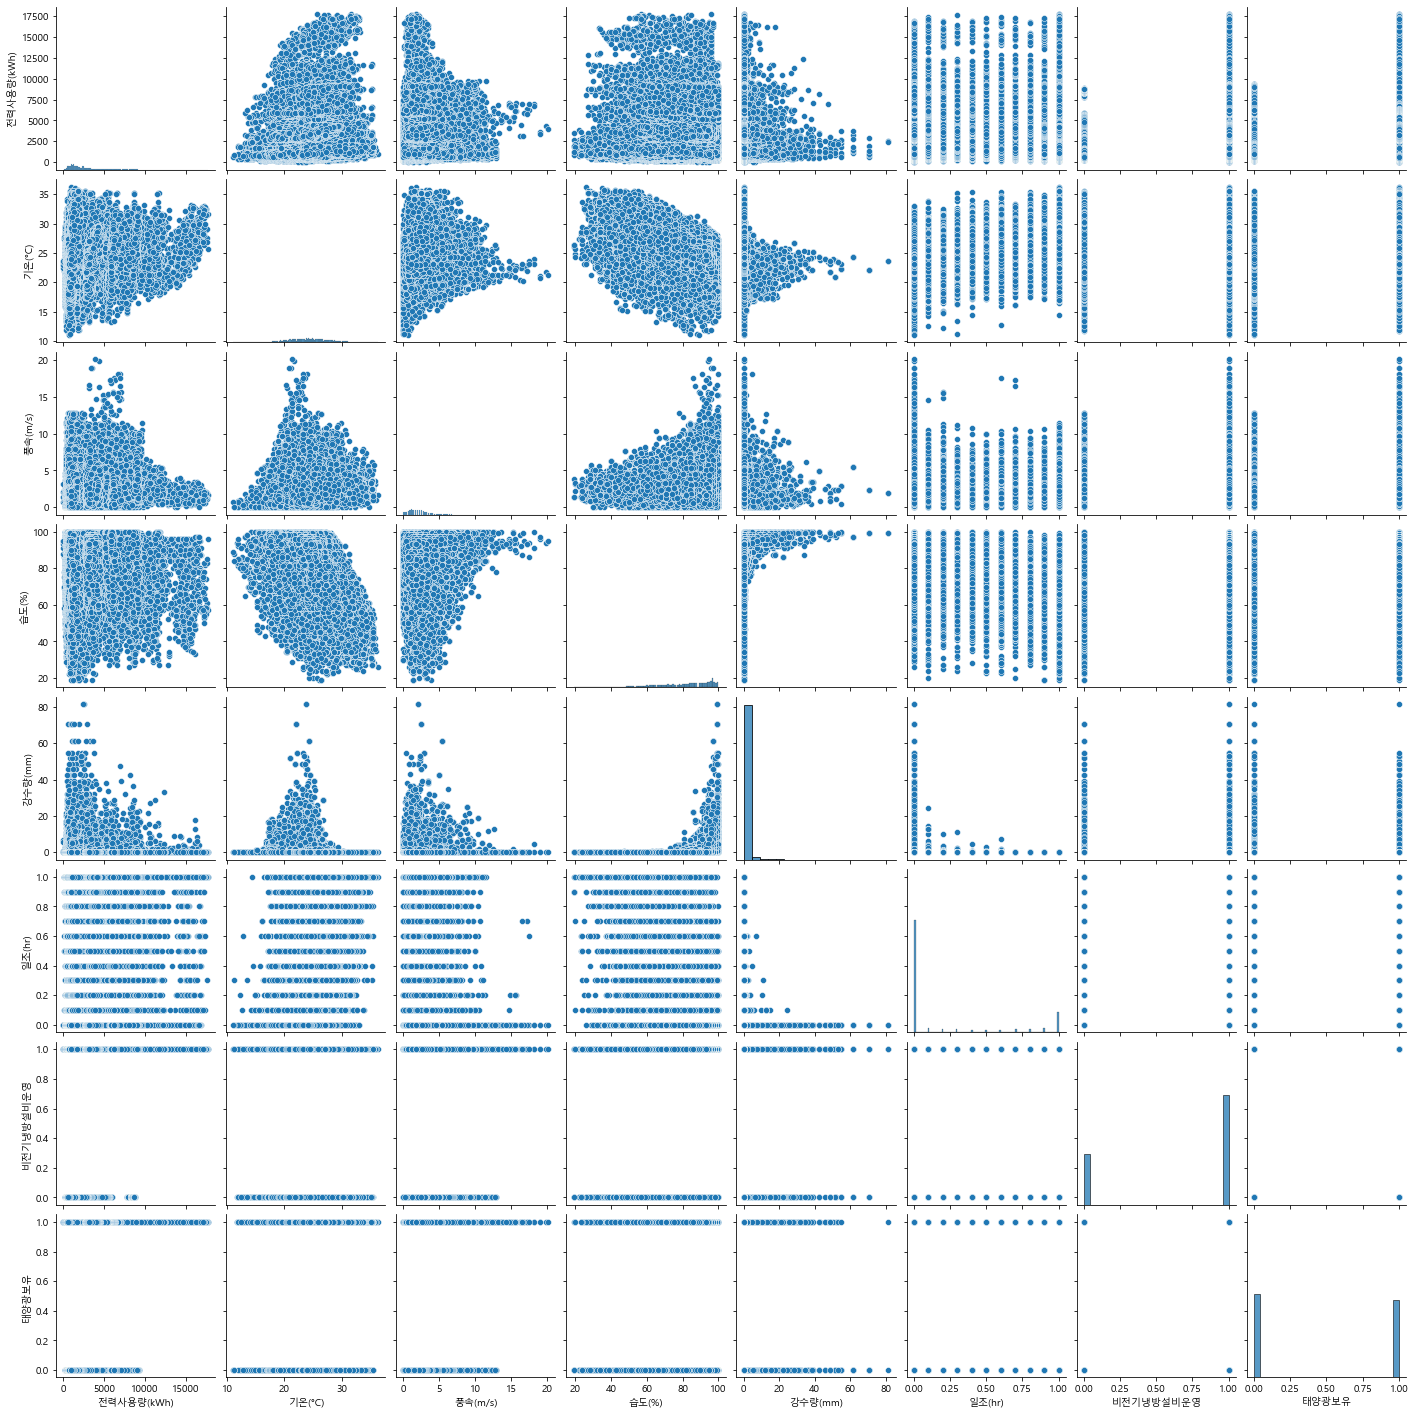

In [81]:
import seaborn as sns
sns.pairplot(df_energy)

### 범주형 자료 encoding 클래스

In [83]:
categorical_columns = df_energy.columns[df_energy.dtypes==object].tolist()

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
hot = ohe.fit_transform(df_energy[categorical_columns])
hot_df = pd.DataFrame(hot.toarray())
hot_df.head()

,0,1,2,3
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0


In [84]:
cold_df = df_energy.select_dtypes(exclude=["object"])
cold_df.head()

,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr)
0,8179.056,17.6,2.5,92.0,0.8,0.0
1,8135.640,17.7,2.9,91.0,0.3,0.0
2,8107.128,17.5,3.2,91.0,0.0,0.0
3,8048.808,17.1,3.2,91.0,0.0,0.0
4,8043.624,17.0,3.3,92.0,0.0,0.0


In [85]:
final_df = pd.concat([cold_df,hot_df],axis=1)
final_df.head()

,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),0,1,2,3
0,8179.056,17.6,2.5,92.0,0.8,0.0,1.0,0.0,1.0,0.0
1,8135.640,17.7,2.9,91.0,0.3,0.0,1.0,0.0,1.0,0.0
2,8107.128,17.5,3.2,91.0,0.0,0.0,1.0,0.0,1.0,0.0
3,8048.808,17.1,3.2,91.0,0.0,0.0,1.0,0.0,1.0,0.0
4,8043.624,17.0,3.3,92.0,0.0,0.0,1.0,0.0,1.0,0.0


In [29]:
from scipy.sparse import csr_matrix
cold = csr_matrix(cold_df)

from scipy.sparse import hstack
final_sparse_matrix = hstack((hot, cold))

final_df = pd.DataFrame(final_sparse_matrix.toarray())
final_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,8179.056,17.6,2.5,92.0,0.8,0.0
1,1.0,0.0,1.0,0.0,8135.640,17.7,2.9,91.0,0.3,0.0
2,1.0,0.0,1.0,0.0,8107.128,17.5,3.2,91.0,0.0,0.0
3,1.0,0.0,1.0,0.0,8048.808,17.1,3.2,91.0,0.0,0.0
4,1.0,0.0,1.0,0.0,8043.624,17.0,3.3,92.0,0.0,0.0


### 범주형 자료 dummies

In [16]:
# 범주형 자료를 수량화
df = pd.get_dummies(df_energy)
df.head()

,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영_0.0,비전기냉방설비운영_1.0,태양광보유_0.0,태양광보유_1.0
0,8179.056,17.6,2.5,92.0,0.8,0.0,1,0,1,0
1,8135.640,17.7,2.9,91.0,0.3,0.0,1,0,1,0
2,8107.128,17.5,3.2,91.0,0.0,0.0,1,0,1,0
3,8048.808,17.1,3.2,91.0,0.0,0.0,1,0,1,0
4,8043.624,17.0,3.3,92.0,0.0,0.0,1,0,1,0


In [17]:
# 특성변수, 목적변수 나누기
X = df.iloc[:,[1,2,3,4,5,6,7,8,9]]
y = df.iloc[:,0]
X.shape

(122400, 9)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # 학습데이터와 시험데이터

In [19]:
X_train_p, X_val, y_train_p, y_val = train_test_split(X_train, y_train, random_state=2) # 학습데이터와 검증데이터

## 기본 회귀 모형 확인

In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor, XGBClassifier, XGBRFRegressor, XGBRFClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
from catboost import CatBoostRegressor,CatBoostClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [22]:
def regression_model(model):
    # Obtain scores of cross-validation using 10 splits and mean squared error
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)

    # Take square root of the scores
    rmse = (-scores)**0.5

    # Return mean score
    return rmse.mean()

In [46]:
regression_model(LinearRegression())

1988.2078486667476

In [47]:
# 시간오래걸림
regression_model(RandomForestRegressor())

2233.9159999695516

In [48]:
regression_model(XGBRegressor(booster='gbtree'))

1929.620849628968

In [49]:
regression_model(XGBRegressor(booster='gblinear'))

1990.980049157907

In [50]:
# 오래걸림
regression_model(XGBRegressor(num_parallel_tree=25))

1929.199870103001

In [51]:
regression_model(LGBMRegressor())

1918.9311156628967

In [21]:
regression_model(CatBoostRegressor(n_estimators=100))

Learning rate set to 0.5
0:	learn: 1984.5564226	total: 187ms	remaining: 18.5s
1:	learn: 1958.4462092	total: 210ms	remaining: 10.3s
2:	learn: 1947.8583453	total: 223ms	remaining: 7.21s
3:	learn: 1940.3424474	total: 236ms	remaining: 5.65s
4:	learn: 1935.5625224	total: 248ms	remaining: 4.71s
5:	learn: 1933.6329356	total: 260ms	remaining: 4.07s
6:	learn: 1931.2384796	total: 272ms	remaining: 3.61s
7:	learn: 1929.3934180	total: 282ms	remaining: 3.24s
8:	learn: 1927.7754011	total: 292ms	remaining: 2.95s
9:	learn: 1926.5215739	total: 302ms	remaining: 2.72s
10:	learn: 1924.2902132	total: 313ms	remaining: 2.54s
11:	learn: 1923.3496160	total: 323ms	remaining: 2.37s
12:	learn: 1922.8350064	total: 334ms	remaining: 2.23s
13:	learn: 1922.5214959	total: 345ms	remaining: 2.12s
14:	learn: 1922.0982118	total: 354ms	remaining: 2.01s
15:	learn: 1921.2256361	total: 364ms	remaining: 1.91s
16:	learn: 1920.6277215	total: 373ms	remaining: 1.82s
17:	learn: 1920.4359810	total: 386ms	remaining: 1.76s
18:	learn: 19

57:	learn: 1905.1483265	total: 612ms	remaining: 444ms
58:	learn: 1904.5456429	total: 627ms	remaining: 436ms
59:	learn: 1904.2291833	total: 639ms	remaining: 426ms
60:	learn: 1903.9394746	total: 648ms	remaining: 414ms
61:	learn: 1903.5215506	total: 658ms	remaining: 404ms
62:	learn: 1903.2525257	total: 668ms	remaining: 392ms
63:	learn: 1902.9397679	total: 677ms	remaining: 381ms
64:	learn: 1902.8060831	total: 686ms	remaining: 369ms
65:	learn: 1902.4990307	total: 695ms	remaining: 358ms
66:	learn: 1902.3449974	total: 704ms	remaining: 347ms
67:	learn: 1901.8370854	total: 713ms	remaining: 336ms
68:	learn: 1901.5214599	total: 722ms	remaining: 324ms
69:	learn: 1901.2189388	total: 732ms	remaining: 314ms
70:	learn: 1900.9824939	total: 741ms	remaining: 303ms
71:	learn: 1900.8686512	total: 749ms	remaining: 291ms
72:	learn: 1900.6085833	total: 760ms	remaining: 281ms
73:	learn: 1900.2159932	total: 773ms	remaining: 272ms
74:	learn: 1899.9744554	total: 785ms	remaining: 262ms
75:	learn: 1899.6082944	tota

9:	learn: 1927.3662631	total: 120ms	remaining: 1.08s
10:	learn: 1925.1377822	total: 138ms	remaining: 1.12s
11:	learn: 1924.1469256	total: 150ms	remaining: 1.1s
12:	learn: 1922.5051000	total: 166ms	remaining: 1.11s
13:	learn: 1921.8754788	total: 180ms	remaining: 1.1s
14:	learn: 1921.5089868	total: 192ms	remaining: 1.09s
15:	learn: 1920.0901879	total: 201ms	remaining: 1.05s
16:	learn: 1919.8410024	total: 209ms	remaining: 1.02s
17:	learn: 1918.5742859	total: 220ms	remaining: 1s
18:	learn: 1918.2827105	total: 229ms	remaining: 977ms
19:	learn: 1917.5558237	total: 239ms	remaining: 957ms
20:	learn: 1916.9410337	total: 248ms	remaining: 934ms
21:	learn: 1916.6583810	total: 257ms	remaining: 911ms
22:	learn: 1916.0841548	total: 267ms	remaining: 892ms
23:	learn: 1915.3634986	total: 276ms	remaining: 873ms
24:	learn: 1914.8145612	total: 284ms	remaining: 852ms
25:	learn: 1914.5221801	total: 294ms	remaining: 836ms
26:	learn: 1913.8887847	total: 307ms	remaining: 829ms
27:	learn: 1913.6704339	total: 318

62:	learn: 1900.7477739	total: 826ms	remaining: 485ms
63:	learn: 1900.4594229	total: 841ms	remaining: 473ms
64:	learn: 1900.2073628	total: 853ms	remaining: 459ms
65:	learn: 1899.9540458	total: 865ms	remaining: 446ms
66:	learn: 1899.5653715	total: 877ms	remaining: 432ms
67:	learn: 1898.8855839	total: 891ms	remaining: 419ms
68:	learn: 1898.5970688	total: 903ms	remaining: 406ms
69:	learn: 1898.4233107	total: 916ms	remaining: 393ms
70:	learn: 1898.2820444	total: 930ms	remaining: 380ms
71:	learn: 1898.0648655	total: 943ms	remaining: 367ms
72:	learn: 1897.6997897	total: 953ms	remaining: 353ms
73:	learn: 1897.3840673	total: 965ms	remaining: 339ms
74:	learn: 1897.1240160	total: 976ms	remaining: 325ms
75:	learn: 1896.6635332	total: 987ms	remaining: 312ms
76:	learn: 1896.6020131	total: 996ms	remaining: 298ms
77:	learn: 1896.4814165	total: 1.01s	remaining: 284ms
78:	learn: 1896.1215403	total: 1.02s	remaining: 271ms
79:	learn: 1895.7378878	total: 1.03s	remaining: 258ms
80:	learn: 1895.4731287	tota

1922.64402425404

In [ ]:
# regrssion_model(SVR(kernel='rbf'))

In [ ]:
# regression_model(SVR(kernel='linear'))

In [24]:
regression_model(DecisionTreeRegressor())

2537.766386219721

In [25]:
regression_model(GradientBoostingRegressor())

1936.4765964355436

## 초모수 튜닝

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold

### 0) num_parallel_tree=25

In [24]:
kfold = KFold(n_splits=3, shuffle=True, random_state=2)
def grid_search_xg1(params, reg=XGBRegressor(num_parallel_tree=25, missing=-999.0),random=False):
    if random:
        grid_reg = RandomizedSearchCV(reg, params, scoring='neg_mean_squared_error',
                                      cv=kfold, n_iter=50, n_jobs=-1, random_state=2)
    else:
        grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)
        
    grid_reg.fit(X_train, y_train)
    
    best_params = grid_reg.best_params_
    print("Best params:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("Best score:", best_score)

In [106]:
grid_search_xg1(params={'n_estimators':[50,100, 200, 300]})

Best params: {'n_estimators': 50}
Best score: 1926.5575470089466


In [108]:
grid_search_xg1(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

Best params: {'learning_rate': 0.05}
Best score: 1919.5955202940129


In [109]:
grid_search_xg1(params={'max_depth':[2, 3, 5, 6, 8]})

Best params: {'max_depth': 3}
Best score: 1925.6965400516692


In [110]:
grid_search_xg1(params={'gamma':[0, 0.01, 0.1, 0.5, 1, 2]})

Best params: {'gamma': 0}
Best score: 1936.746003015246


In [111]:
grid_search_xg1(params={'min_child_weight':[1, 2, 3, 4, 5]})

Best params: {'min_child_weight': 4}
Best score: 1934.860410746966


In [112]:
grid_search_xg1(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'subsample': 0.9}
Best score: 1932.1499848311107


In [113]:
grid_search_xg1(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bytree': 0.7}
Best score: 1927.5665000897516


In [117]:
# 랜덤
grid_search_xg1(params={'n_estimators':[40,50, 60],'learning_rate':[0.01, 0.05,0.1],
                      'max_depth':[2,3,4],'gamma':[0, 0.1], 'min_child_weight':[3,4,5],
                      'subsample':[0.9, 1],'colsample_bytree':[0.6,0.7,0.8]},random=True)

Best params: {'subsample': 0.9, 'n_estimators': 60, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best score: 1927.5975180887033


In [25]:
grid_search_xg1(params={'n_estimators':[50,55,60],'learning_rate':[0.01, 0.05,0.007],
                      'max_depth':[2,3,4],'gamma':[0, 0.1], 'min_child_weight':[4,5],
                      'subsample':[0.9],'colsample_bytree':[0.7,0.75, 0.8]},random=True)

Best params: {'subsample': 0.9, 'n_estimators': 60, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best score: 1940.139618467951


In [26]:
def randomized_search_reg(model,params, cv=5,runs=10):

    
    rand_reg = RandomizedSearchCV(model, params, n_iter=runs, scoring='neg_mean_squared_error', 
                                  cv=5, n_jobs=-1, random_state=2)
    
    rand_reg.fit(X_train, y_train)

    best_model = rand_reg.best_estimator_
    best_params = rand_reg.best_params_

    print("Best params:", best_params)
    
    best_score = np.sqrt(-rand_reg.best_score_)
    print("Training score: {:.3f}".format(best_score))
    return best_model

In [27]:
xg_model1=XGBRegressor(num_parallel_tree=25, random_state=2, n_jobs=-1)
cv=KFold(n_splits=3,shuffle=True,random_state=0)
params={'n_estimators':[40,50, 60],'learning_rate':[0.01, 0.05,0.1],
                      'max_depth':[2,3,4],'gamma':[0, 0.1], 'min_child_weight':[3,4,5],
                      'subsample':[0.9, 1],'colsample_bytree':[0.6,0.7,0.8]}
best_model=randomized_search_reg(xg_model1,params,cv=cv,runs=20)

y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_test, y_pred)**0.5
print('Test score: {:.3f}'.format(rmse_test))

Best params: {'subsample': 0.9, 'n_estimators': 60, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Training score: 1927.206
Test score: 1949.031


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
inner_cv=KFold(n_splits=3,shuffle=True,random_state=0)
out_cv=KFold(n_splits=5,shuffle=True,random_state=0)

parm_all={'n_estimators':[40,50, 60],'learning_rate':[0.01, 0.05,0.1],
                      'max_depth':[2,3,4],'gamma':[0, 0.1], 'min_child_weight':[3,4,5],
                      'subsample':[0.9, 1],'colsample_bytree':[0.6,0.7,0.8]}
rand = RandomizedSearchCV(XGBRegressor(num_parallel_tree=25, random_state=2, n_jobs=-1), param_distributions=parm_all, n_iter=20, 
                                 scoring='neg_mean_squared_error', cv=inner_cv, n_jobs=-1, random_state=2)
scores=cross_val_score(rand,X,y,scoring='neg_mean_squared_error',cv=out_cv)    

rmse=np.sqrt(-scores)
print("RMSE: %.3f, +/-%.3f" %(np.mean(rmse),np.std(rmse)))

### 1) XG 초모수 조정

In [94]:
kfold = KFold(n_splits=3, shuffle=True, random_state=2)
def grid_search_xg(params, reg=XGBRegressor(missing=-999.0),random=False):
    if random:
        grid_reg = RandomizedSearchCV(reg, params, scoring='neg_mean_squared_error',
                                      cv=kfold, n_iter=50, n_jobs=-1, random_state=2)
    else:
        grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)
        
    grid_reg.fit(X_train, y_train)
    
    best_params = grid_reg.best_params_
    print("Best params:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("Best score:", best_score)

In [79]:
grid_search_xg(params={'n_estimators':[50,100, 200, 300]})

Best params: {'n_estimators': 50}
Best score: 1922.431219984604


In [80]:
grid_search_xg(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

Best params: {'learning_rate': 0.1}
Best score: 1917.3149240700213


In [83]:
grid_search_xg(params={'max_depth':[2, 3, 5, 6, 8]})

Best params: {'max_depth': 5}
Best score: 1924.364449267632


In [84]:
grid_search_xg(params={'gamma':[0, 0.01, 0.1, 0.5, 1, 2]})

Best params: {'gamma': 0}
Best score: 1932.5220462748318


In [85]:
grid_search_xg(params={'min_child_weight':[1, 2, 3, 4, 5]})

Best params: {'min_child_weight': 5}
Best score: 1930.0181546906965


In [86]:
grid_search_xg(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'subsample': 1}
Best score: 1932.5220462748318


In [87]:
grid_search_xg(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bytree': 0.5}
Best score: 1931.236452907668


In [95]:
# 랜덤
grid_search_xg(params={'n_estimators':[50, 70, 100],'learning_rate':[0.05,0.1, 0.15],
                      'max_depth':[3,5,6],'gamma':[0, 0.1], 'min_child_weight':[3,5,7],
                      'subsample':[0.9, 1],'colsample_bytree':[0.3,0.5,0.7]},random=True)

Best params: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best score: 1918.988332381581


In [32]:
def randomized_search_reg(model,params, cv=5,runs=10):

    
    rand_reg = RandomizedSearchCV(model, params, n_iter=runs, scoring='neg_mean_squared_error', 
                                  cv=5, n_jobs=-1, random_state=2)
    
    rand_reg.fit(X_train, y_train)

    best_model = rand_reg.best_estimator_
    best_params = rand_reg.best_params_

    print("Best params:", best_params)
    
    best_score = np.sqrt(-rand_reg.best_score_)
    print("Training score: {:.3f}".format(best_score))
    return best_model

In [100]:
xg_model=XGBRegressor(random_state=2, n_jobs=-1)
cv=KFold(n_splits=3,shuffle=True,random_state=0)
params={'n_estimators':[50, 70, 100],'learning_rate':[0.05,0.1, 0.15],
                      'max_depth':[3,5,6],'gamma':[0, 0.1], 'min_child_weight':[3,5,7],
                      'subsample':[0.9, 1],'colsample_bytree':[0.3,0.5,0.7]}
best_model=randomized_search_reg(xg_model,params,cv=cv,runs=20)

y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_test, y_pred)**0.5
print('Test score: {:.3f}'.format(rmse_test))

Best params: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Training score: 1918.715
Test score: 1938.498


In [103]:
from sklearn.model_selection import KFold, StratifiedKFold
inner_cv=KFold(n_splits=3,shuffle=True,random_state=0)
out_cv=KFold(n_splits=5,shuffle=True,random_state=0)

parm_all={'n_estimators':[300, 200],'learning_rate':[0.05,0.1, 0.2],
                      'max_depth':[5,6,7], 'min_child_weight':[3,5],
                      'subsample':[0.8, 0.9],'colsample_bytree':[0.5,0.7]}
rand = RandomizedSearchCV(XGBRegressor(random_state=2, n_jobs=-1), param_distributions=parm_all, n_iter=20, 
                                 scoring='neg_mean_squared_error', cv=inner_cv, n_jobs=-1, random_state=2)
scores=cross_val_score(rand,X,y,scoring='neg_mean_squared_error',cv=out_cv)    

rmse=np.sqrt(-scores)
print("RMSE: %.3f, +/-%.3f" %(np.mean(rmse),np.std(rmse)))

RMSE: 1921.274, +/-10.953


### 2) Ligth 초무수 조정

In [19]:
kfold = KFold(n_splits=3, shuffle=True, random_state=2)
def grid_search_lgb(params, reg=LGBMRegressor(), random=False):    
    if random:
        grid_reg = RandomizedSearchCV(reg, params, scoring='neg_mean_squared_error',
                                      cv=kfold, n_iter=50, n_jobs=-1, random_state=2)
        
    else:
        grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)
    
    grid_reg.fit(X_train, y_train)

    best_params = grid_reg.best_params_
    print("Best params:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("Best score:", best_score)

In [20]:
grid_search_lgb(params={'n_estimators':[50,100, 200, 300]})

Best params: {'n_estimators': 100}
Best score: 1918.7669866584686


In [21]:
grid_search_lgb(params={'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]})

Best params: {'learning_rate': 0.05}
Best score: 1918.6550921084856


In [22]:
grid_search_lgb(params={'max_depth':[2, 3, 5, 6, 8]})

Best params: {'max_depth': 8}
Best score: 1917.590104811561


In [23]:
grid_search_lgb(params={'min_child_weight':[1, 2, 3, 4, 5]})

Best params: {'min_child_weight': 1}
Best score: 1918.7669866584686


In [24]:
grid_search_lgb(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'subsample': 0.5}
Best score: 1918.7669866584686


In [25]:
grid_search_lgb(params={'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1]})

Best params: {'colsample_bytree': 0.9}
Best score: 1918.1702740199655


In [28]:
grid_search_lgb(params={'n_estimators':[50,100,150],'learning_rate':[0.01,0.05,0.1],
                      'max_depth':[6,8,10],'min_child_weight':[1,2,3],
                      'subsample':[0.4,0.5,0.6],'colsample_bytree':[0.85,0.90,1]},random=True)

Best params: {'subsample': 0.5, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 1}
Best score: 1917.387857677375


In [31]:
grid_search_lgb(params={'n_estimators':[130,150,170,200],'learning_rate':[0.01,0.05,0.1],
                      'max_depth':[7,8,9],'min_child_weight':[2,3,4],
                      'subsample':[0.45,0.5,0.55],'colsample_bytree':[0.90,0.95,1]},random=True)

Best params: {'subsample': 0.45, 'n_estimators': 200, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.95}
Best score: 1917.3684700511506


In [37]:
grid_search_lgb(params={'n_estimators':[150,170,200],'learning_rate':[0.01,0.05,0.1],
                      'max_depth':[7,8,9],'min_child_weight':[2,3,4],
                      'subsample':[0.45,0.5,0.55],'colsample_bytree':[0.90,0.95,1]})

Best params: {'colsample_bytree': 0.95, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.45}
Best score: 1917.3684700511506


In [34]:
lgb_model=LGBMRegressor(random_state=2, n_jobs=-1)
cv=KFold(n_splits=3,shuffle=True,random_state=0)
params={'n_estimators':[150,170,200],'learning_rate':[0.03,0.05,0.07],
                      'max_depth':[7,8,9],'min_child_weight':[3,4,5],
                      'subsample':[0.45,0.5,0.55],'colsample_bytree':[0.90,0.95,1]}
best_model=randomized_search_reg(lgb_model,params,cv=cv,runs=20)

y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_test, y_pred)**0.5
print('Test score: {:.3f}'.format(rmse_test))

Best params: {'subsample': 0.55, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.05, 'colsample_bytree': 0.95}
Training score: 1914.699
Test score: 1936.783


In [36]:
from sklearn.model_selection import KFold, StratifiedKFold
inner_cv=KFold(n_splits=3,shuffle=True,random_state=0)
out_cv=KFold(n_splits=5,shuffle=True,random_state=0)

parm_all={'n_estimators':[130,150,170,200],'learning_rate':[0.01,0.05,0.1],
                      'max_depth':[7,8,9],'min_child_weight':[2,3,4],
                      'subsample':[0.45,0.5,0.55],'colsample_bytree':[0.90,0.95,1]}
rand = RandomizedSearchCV(LGBMRegressor(random_state=2, n_jobs=-1), param_distributions=parm_all, n_iter=20, 
                                 scoring='neg_mean_squared_error', cv=inner_cv, n_jobs=-1, random_state=2)
scores=cross_val_score(rand,X,y,scoring='neg_mean_squared_error',cv=out_cv)    

rmse=np.sqrt(-scores)
print("RMSE: %.3f, +/-%.3f" %(np.mean(rmse),np.std(rmse)))

RMSE: 1919.485, +/-10.123


### 3) cat 초모수 조정

In [38]:
kfold = KFold(n_splits=3, shuffle=True, random_state=2)
def grid_search_cat(params, reg=CatBoostRegressor(), random=False):    
    if random:
        grid_reg = RandomizedSearchCV(reg, params, scoring='neg_mean_squared_error',
                                      cv=kfold, n_iter=50, n_jobs=-1, random_state=2)
        
    else:
        grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)
    
    grid_reg.fit(X_train, y_train)

    best_params = grid_reg.best_params_
    print("Best params:", best_params)
    best_score = np.sqrt(-grid_reg.best_score_)
    print("Best score:", best_score)

In [39]:
grid_search_cat(params={'n_estimators':[700,1000,1500]})

Learning rate set to 0.111749
0:	learn: 2033.0528048	total: 167ms	remaining: 1m 56s
1:	learn: 2016.0714993	total: 202ms	remaining: 1m 10s
2:	learn: 2002.3417503	total: 221ms	remaining: 51.3s
3:	learn: 1990.6020973	total: 235ms	remaining: 40.9s
4:	learn: 1981.7284880	total: 252ms	remaining: 35s
5:	learn: 1973.7092513	total: 267ms	remaining: 30.9s
6:	learn: 1967.2483388	total: 280ms	remaining: 27.7s
7:	learn: 1961.6274207	total: 293ms	remaining: 25.3s
8:	learn: 1957.0731987	total: 306ms	remaining: 23.5s
9:	learn: 1953.2598563	total: 319ms	remaining: 22s
10:	learn: 1949.7295701	total: 331ms	remaining: 20.8s
11:	learn: 1946.8025592	total: 343ms	remaining: 19.7s
12:	learn: 1943.9035913	total: 355ms	remaining: 18.8s
13:	learn: 1942.0713115	total: 369ms	remaining: 18.1s
14:	learn: 1940.4708041	total: 382ms	remaining: 17.4s
15:	learn: 1938.7800110	total: 401ms	remaining: 17.1s
16:	learn: 1937.1171797	total: 415ms	remaining: 16.7s
17:	learn: 1935.7512650	total: 424ms	remaining: 16.1s
18:	learn:

156:	learn: 1902.5304192	total: 2.12s	remaining: 7.35s
157:	learn: 1902.4071446	total: 2.13s	remaining: 7.33s
158:	learn: 1902.2376264	total: 2.15s	remaining: 7.31s
159:	learn: 1902.2347105	total: 2.16s	remaining: 7.29s
160:	learn: 1902.1988413	total: 2.17s	remaining: 7.26s
161:	learn: 1902.0823299	total: 2.18s	remaining: 7.23s
162:	learn: 1902.0768629	total: 2.19s	remaining: 7.21s
163:	learn: 1902.0125349	total: 2.2s	remaining: 7.19s
164:	learn: 1901.9817251	total: 2.21s	remaining: 7.17s
165:	learn: 1901.8401406	total: 2.22s	remaining: 7.15s
166:	learn: 1901.7178447	total: 2.23s	remaining: 7.14s
167:	learn: 1901.5929039	total: 2.25s	remaining: 7.12s
168:	learn: 1901.4872299	total: 2.26s	remaining: 7.1s
169:	learn: 1901.4276459	total: 2.27s	remaining: 7.08s
170:	learn: 1901.3139653	total: 2.28s	remaining: 7.07s
171:	learn: 1901.1678973	total: 2.3s	remaining: 7.05s
172:	learn: 1901.0422138	total: 2.31s	remaining: 7.04s
173:	learn: 1900.9275009	total: 2.32s	remaining: 7.03s
174:	learn: 1

306:	learn: 1889.7312396	total: 3.88s	remaining: 4.97s
307:	learn: 1889.6968001	total: 3.89s	remaining: 4.95s
308:	learn: 1889.5595311	total: 3.9s	remaining: 4.94s
309:	learn: 1889.5178585	total: 3.92s	remaining: 4.93s
310:	learn: 1889.3249379	total: 3.93s	remaining: 4.91s
311:	learn: 1889.2791901	total: 3.94s	remaining: 4.9s
312:	learn: 1889.2523215	total: 3.95s	remaining: 4.89s
313:	learn: 1889.2182684	total: 3.97s	remaining: 4.88s
314:	learn: 1889.1216275	total: 3.98s	remaining: 4.87s
315:	learn: 1889.0723739	total: 3.99s	remaining: 4.85s
316:	learn: 1889.0032106	total: 4s	remaining: 4.84s
317:	learn: 1888.9608966	total: 4.01s	remaining: 4.82s
318:	learn: 1888.9138704	total: 4.03s	remaining: 4.81s
319:	learn: 1888.8262031	total: 4.04s	remaining: 4.79s
320:	learn: 1888.8077650	total: 4.05s	remaining: 4.78s
321:	learn: 1888.7151614	total: 4.06s	remaining: 4.76s
322:	learn: 1888.6871343	total: 4.07s	remaining: 4.75s
323:	learn: 1888.6178733	total: 4.08s	remaining: 4.74s
324:	learn: 188

460:	learn: 1880.3936968	total: 5.66s	remaining: 2.93s
461:	learn: 1880.3161619	total: 5.67s	remaining: 2.92s
462:	learn: 1880.2695192	total: 5.68s	remaining: 2.91s
463:	learn: 1880.1305873	total: 5.69s	remaining: 2.9s
464:	learn: 1880.0380788	total: 5.7s	remaining: 2.88s
465:	learn: 1879.9897160	total: 5.71s	remaining: 2.87s
466:	learn: 1879.9469128	total: 5.73s	remaining: 2.86s
467:	learn: 1879.9178262	total: 5.74s	remaining: 2.84s
468:	learn: 1879.8433588	total: 5.75s	remaining: 2.83s
469:	learn: 1879.7551497	total: 5.76s	remaining: 2.82s
470:	learn: 1879.7281472	total: 5.77s	remaining: 2.81s
471:	learn: 1879.6882271	total: 5.78s	remaining: 2.79s
472:	learn: 1879.6476527	total: 5.79s	remaining: 2.78s
473:	learn: 1879.5300151	total: 5.8s	remaining: 2.77s
474:	learn: 1879.4675228	total: 5.81s	remaining: 2.75s
475:	learn: 1879.4257562	total: 5.82s	remaining: 2.74s
476:	learn: 1879.3494193	total: 5.84s	remaining: 2.73s
477:	learn: 1879.3137355	total: 5.85s	remaining: 2.71s
478:	learn: 1

613:	learn: 1872.5029028	total: 7.4s	remaining: 1.04s
614:	learn: 1872.4650665	total: 7.42s	remaining: 1.02s
615:	learn: 1872.3901616	total: 7.43s	remaining: 1.01s
616:	learn: 1872.3469997	total: 7.44s	remaining: 1s
617:	learn: 1872.3161816	total: 7.45s	remaining: 988ms
618:	learn: 1872.2812066	total: 7.46s	remaining: 976ms
619:	learn: 1872.2289288	total: 7.47s	remaining: 964ms
620:	learn: 1872.1649133	total: 7.48s	remaining: 952ms
621:	learn: 1872.1117330	total: 7.49s	remaining: 940ms
622:	learn: 1872.0374327	total: 7.5s	remaining: 928ms
623:	learn: 1871.9120313	total: 7.52s	remaining: 916ms
624:	learn: 1871.8156360	total: 7.53s	remaining: 903ms
625:	learn: 1871.7803704	total: 7.54s	remaining: 891ms
626:	learn: 1871.7455465	total: 7.55s	remaining: 879ms
627:	learn: 1871.7258231	total: 7.56s	remaining: 867ms
628:	learn: 1871.7051069	total: 7.57s	remaining: 855ms
629:	learn: 1871.6777669	total: 7.58s	remaining: 842ms
630:	learn: 1871.6173596	total: 7.59s	remaining: 830ms
631:	learn: 187

In [40]:
grid_search_cat(params={'learning_rate':[0.01, 0.03, 0.05,0.1]})

0:	learn: 2048.1409824	total: 14ms	remaining: 14s
1:	learn: 2042.6289713	total: 28.3ms	remaining: 14.1s
2:	learn: 2037.4492515	total: 41.7ms	remaining: 13.8s
3:	learn: 2032.5020998	total: 55.2ms	remaining: 13.7s
4:	learn: 2027.7608415	total: 69.3ms	remaining: 13.8s
5:	learn: 2023.3803004	total: 82.3ms	remaining: 13.6s
6:	learn: 2018.9986952	total: 95.4ms	remaining: 13.5s
7:	learn: 2014.9786489	total: 112ms	remaining: 13.8s
8:	learn: 2011.0450314	total: 127ms	remaining: 14s
9:	learn: 2007.4222417	total: 142ms	remaining: 14s
10:	learn: 2004.0726647	total: 155ms	remaining: 14s
11:	learn: 2000.7990741	total: 168ms	remaining: 13.8s
12:	learn: 1997.5575112	total: 181ms	remaining: 13.7s
13:	learn: 1994.5669525	total: 193ms	remaining: 13.6s
14:	learn: 1991.6804439	total: 207ms	remaining: 13.6s
15:	learn: 1989.0022544	total: 222ms	remaining: 13.6s
16:	learn: 1986.4193021	total: 234ms	remaining: 13.5s
17:	learn: 1983.9014600	total: 248ms	remaining: 13.6s
18:	learn: 1981.6436417	total: 267ms	rema

157:	learn: 1920.5515261	total: 2.45s	remaining: 13.1s
158:	learn: 1920.4664613	total: 2.46s	remaining: 13s
159:	learn: 1920.3584295	total: 2.48s	remaining: 13s
160:	learn: 1920.2028591	total: 2.5s	remaining: 13s
161:	learn: 1920.1137331	total: 2.51s	remaining: 13s
162:	learn: 1920.0681194	total: 2.52s	remaining: 12.9s
163:	learn: 1919.9880163	total: 2.53s	remaining: 12.9s
164:	learn: 1919.8919058	total: 2.54s	remaining: 12.9s
165:	learn: 1919.7800173	total: 2.56s	remaining: 12.8s
166:	learn: 1919.7233109	total: 2.57s	remaining: 12.8s
167:	learn: 1919.6631127	total: 2.58s	remaining: 12.8s
168:	learn: 1919.6095754	total: 2.59s	remaining: 12.7s
169:	learn: 1919.5278300	total: 2.6s	remaining: 12.7s
170:	learn: 1919.4615969	total: 2.61s	remaining: 12.7s
171:	learn: 1919.3951038	total: 2.63s	remaining: 12.6s
172:	learn: 1919.3603929	total: 2.64s	remaining: 12.6s
173:	learn: 1919.2578058	total: 2.66s	remaining: 12.6s
174:	learn: 1919.1804306	total: 2.67s	remaining: 12.6s
175:	learn: 1919.110

316:	learn: 1911.6549620	total: 4.61s	remaining: 9.93s
317:	learn: 1911.6152607	total: 4.63s	remaining: 9.93s
318:	learn: 1911.5835596	total: 4.65s	remaining: 9.92s
319:	learn: 1911.5558301	total: 4.66s	remaining: 9.9s
320:	learn: 1911.5239120	total: 4.67s	remaining: 9.89s
321:	learn: 1911.4839718	total: 4.69s	remaining: 9.87s
322:	learn: 1911.4545569	total: 4.7s	remaining: 9.85s
323:	learn: 1911.3793675	total: 4.71s	remaining: 9.83s
324:	learn: 1911.3564054	total: 4.72s	remaining: 9.81s
325:	learn: 1911.3144099	total: 4.74s	remaining: 9.79s
326:	learn: 1911.2873867	total: 4.75s	remaining: 9.78s
327:	learn: 1911.2519076	total: 4.76s	remaining: 9.76s
328:	learn: 1911.2380239	total: 4.78s	remaining: 9.74s
329:	learn: 1911.2238866	total: 4.79s	remaining: 9.72s
330:	learn: 1911.2025470	total: 4.8s	remaining: 9.7s
331:	learn: 1911.1779420	total: 4.81s	remaining: 9.68s
332:	learn: 1911.1207948	total: 4.83s	remaining: 9.67s
333:	learn: 1911.0849891	total: 4.84s	remaining: 9.65s
334:	learn: 19

469:	learn: 1905.3941255	total: 6.78s	remaining: 7.65s
470:	learn: 1905.3768387	total: 6.8s	remaining: 7.64s
471:	learn: 1905.3413531	total: 6.81s	remaining: 7.62s
472:	learn: 1905.3038352	total: 6.82s	remaining: 7.6s
473:	learn: 1905.2531241	total: 6.84s	remaining: 7.59s
474:	learn: 1905.2077372	total: 6.85s	remaining: 7.57s
475:	learn: 1905.1924962	total: 6.86s	remaining: 7.55s
476:	learn: 1905.1472957	total: 6.87s	remaining: 7.53s
477:	learn: 1905.1374334	total: 6.88s	remaining: 7.51s
478:	learn: 1905.0710324	total: 6.89s	remaining: 7.5s
479:	learn: 1905.0529664	total: 6.9s	remaining: 7.48s
480:	learn: 1904.9854028	total: 6.92s	remaining: 7.46s
481:	learn: 1904.9388517	total: 6.93s	remaining: 7.44s
482:	learn: 1904.9201312	total: 6.94s	remaining: 7.43s
483:	learn: 1904.8946745	total: 6.95s	remaining: 7.41s
484:	learn: 1904.8588062	total: 6.96s	remaining: 7.39s
485:	learn: 1904.8371514	total: 6.97s	remaining: 7.37s
486:	learn: 1904.7732993	total: 6.98s	remaining: 7.36s
487:	learn: 19

626:	learn: 1901.1847057	total: 8.56s	remaining: 5.09s
627:	learn: 1901.1644746	total: 8.57s	remaining: 5.08s
628:	learn: 1901.1501466	total: 8.58s	remaining: 5.06s
629:	learn: 1901.1180411	total: 8.59s	remaining: 5.05s
630:	learn: 1901.1051321	total: 8.6s	remaining: 5.03s
631:	learn: 1901.0878507	total: 8.61s	remaining: 5.02s
632:	learn: 1901.0863692	total: 8.63s	remaining: 5s
633:	learn: 1901.0276772	total: 8.64s	remaining: 4.99s
634:	learn: 1901.0266641	total: 8.65s	remaining: 4.97s
635:	learn: 1900.9952716	total: 8.66s	remaining: 4.96s
636:	learn: 1900.9773876	total: 8.67s	remaining: 4.94s
637:	learn: 1900.9645851	total: 8.68s	remaining: 4.92s
638:	learn: 1900.9245593	total: 8.69s	remaining: 4.91s
639:	learn: 1900.8929726	total: 8.7s	remaining: 4.89s
640:	learn: 1900.8921975	total: 8.71s	remaining: 4.88s
641:	learn: 1900.8560809	total: 8.72s	remaining: 4.86s
642:	learn: 1900.8296545	total: 8.73s	remaining: 4.85s
643:	learn: 1900.8291284	total: 8.74s	remaining: 4.83s
644:	learn: 190

780:	learn: 1897.2888200	total: 10.3s	remaining: 2.89s
781:	learn: 1897.2689915	total: 10.3s	remaining: 2.88s
782:	learn: 1897.2574416	total: 10.3s	remaining: 2.87s
783:	learn: 1897.2373068	total: 10.4s	remaining: 2.85s
784:	learn: 1897.2352199	total: 10.4s	remaining: 2.84s
785:	learn: 1897.1802419	total: 10.4s	remaining: 2.83s
786:	learn: 1897.1551909	total: 10.4s	remaining: 2.81s
787:	learn: 1897.1301818	total: 10.4s	remaining: 2.8s
788:	learn: 1897.1190699	total: 10.4s	remaining: 2.78s
789:	learn: 1897.0914420	total: 10.4s	remaining: 2.77s
790:	learn: 1897.0422113	total: 10.4s	remaining: 2.76s
791:	learn: 1896.9958312	total: 10.4s	remaining: 2.74s
792:	learn: 1896.9953338	total: 10.5s	remaining: 2.73s
793:	learn: 1896.9558414	total: 10.5s	remaining: 2.72s
794:	learn: 1896.9290574	total: 10.5s	remaining: 2.7s
795:	learn: 1896.9119286	total: 10.5s	remaining: 2.69s
796:	learn: 1896.8771220	total: 10.5s	remaining: 2.67s
797:	learn: 1896.8549168	total: 10.5s	remaining: 2.66s
798:	learn: 

937:	learn: 1893.7560787	total: 12.1s	remaining: 800ms
938:	learn: 1893.7396492	total: 12.1s	remaining: 787ms
939:	learn: 1893.7347235	total: 12.1s	remaining: 774ms
940:	learn: 1893.7218474	total: 12.1s	remaining: 761ms
941:	learn: 1893.7007401	total: 12.1s	remaining: 748ms
942:	learn: 1893.6905134	total: 12.2s	remaining: 735ms
943:	learn: 1893.6643416	total: 12.2s	remaining: 722ms
944:	learn: 1893.6436792	total: 12.2s	remaining: 709ms
945:	learn: 1893.6231529	total: 12.2s	remaining: 696ms
946:	learn: 1893.5930067	total: 12.2s	remaining: 683ms
947:	learn: 1893.5703362	total: 12.2s	remaining: 670ms
948:	learn: 1893.5417797	total: 12.2s	remaining: 657ms
949:	learn: 1893.5194443	total: 12.2s	remaining: 644ms
950:	learn: 1893.4801627	total: 12.2s	remaining: 631ms
951:	learn: 1893.4559072	total: 12.3s	remaining: 618ms
952:	learn: 1893.4291728	total: 12.3s	remaining: 605ms
953:	learn: 1893.3852223	total: 12.3s	remaining: 592ms
954:	learn: 1893.3770108	total: 12.3s	remaining: 579ms
955:	learn

In [41]:
grid_search_cat(params={'max_depth':[2, 3, 5, 6, 8]})

Learning rate set to 0.08362
0:	learn: 2038.9091987	total: 18.4ms	remaining: 18.4s
1:	learn: 2026.3466756	total: 32.3ms	remaining: 16.1s
2:	learn: 2015.3169145	total: 46.2ms	remaining: 15.4s
3:	learn: 2006.3008395	total: 60.3ms	remaining: 15s
4:	learn: 1998.0493102	total: 72ms	remaining: 14.3s
5:	learn: 1991.3606888	total: 83.4ms	remaining: 13.8s
6:	learn: 1984.9409951	total: 94.3ms	remaining: 13.4s
7:	learn: 1979.4068913	total: 104ms	remaining: 12.9s
8:	learn: 1974.4800790	total: 114ms	remaining: 12.6s
9:	learn: 1970.5615648	total: 124ms	remaining: 12.3s
10:	learn: 1967.0053760	total: 134ms	remaining: 12.1s
11:	learn: 1963.6152980	total: 144ms	remaining: 11.9s
12:	learn: 1960.5504563	total: 159ms	remaining: 12.1s
13:	learn: 1957.6195564	total: 173ms	remaining: 12.2s
14:	learn: 1955.2985126	total: 187ms	remaining: 12.3s
15:	learn: 1953.2389422	total: 201ms	remaining: 12.4s
16:	learn: 1951.1486413	total: 215ms	remaining: 12.4s
17:	learn: 1949.7486564	total: 227ms	remaining: 12.4s
18:	le

165:	learn: 1912.2725207	total: 1.9s	remaining: 9.56s
166:	learn: 1912.1481094	total: 1.91s	remaining: 9.54s
167:	learn: 1912.0741965	total: 1.92s	remaining: 9.53s
168:	learn: 1911.8967206	total: 1.93s	remaining: 9.51s
169:	learn: 1911.8005285	total: 1.94s	remaining: 9.49s
170:	learn: 1911.7519290	total: 1.96s	remaining: 9.48s
171:	learn: 1911.6326262	total: 1.97s	remaining: 9.5s
172:	learn: 1911.5499108	total: 1.98s	remaining: 9.48s
173:	learn: 1911.4311335	total: 1.99s	remaining: 9.46s
174:	learn: 1911.3731343	total: 2s	remaining: 9.44s
175:	learn: 1911.2937496	total: 2.01s	remaining: 9.42s
176:	learn: 1911.2193731	total: 2.02s	remaining: 9.41s
177:	learn: 1911.1173513	total: 2.04s	remaining: 9.4s
178:	learn: 1911.0764172	total: 2.04s	remaining: 9.38s
179:	learn: 1911.0177372	total: 2.05s	remaining: 9.36s
180:	learn: 1910.9722599	total: 2.06s	remaining: 9.34s
181:	learn: 1910.8849648	total: 2.07s	remaining: 9.32s
182:	learn: 1910.7887542	total: 2.08s	remaining: 9.3s
183:	learn: 1910.

332:	learn: 1902.1154691	total: 3.66s	remaining: 7.34s
333:	learn: 1902.1080322	total: 3.67s	remaining: 7.32s
334:	learn: 1902.0341170	total: 3.68s	remaining: 7.31s
335:	learn: 1901.9826370	total: 3.69s	remaining: 7.3s
336:	learn: 1901.9041330	total: 3.71s	remaining: 7.29s
337:	learn: 1901.8783569	total: 3.72s	remaining: 7.28s
338:	learn: 1901.8050421	total: 3.73s	remaining: 7.27s
339:	learn: 1901.7282429	total: 3.74s	remaining: 7.26s
340:	learn: 1901.6947958	total: 3.75s	remaining: 7.24s
341:	learn: 1901.6934607	total: 3.76s	remaining: 7.23s
342:	learn: 1901.6746660	total: 3.77s	remaining: 7.21s
343:	learn: 1901.6555739	total: 3.78s	remaining: 7.2s
344:	learn: 1901.6536873	total: 3.79s	remaining: 7.19s
345:	learn: 1901.6105404	total: 3.8s	remaining: 7.17s
346:	learn: 1901.6045448	total: 3.81s	remaining: 7.16s
347:	learn: 1901.4860986	total: 3.82s	remaining: 7.15s
348:	learn: 1901.4296300	total: 3.83s	remaining: 7.14s
349:	learn: 1901.3690038	total: 3.84s	remaining: 7.13s
350:	learn: 1

499:	learn: 1895.1389750	total: 5.38s	remaining: 5.38s
500:	learn: 1895.0766330	total: 5.39s	remaining: 5.37s
501:	learn: 1895.0396662	total: 5.4s	remaining: 5.36s
502:	learn: 1894.9958429	total: 5.41s	remaining: 5.34s
503:	learn: 1894.9579008	total: 5.42s	remaining: 5.33s
504:	learn: 1894.8926043	total: 5.43s	remaining: 5.32s
505:	learn: 1894.8548995	total: 5.44s	remaining: 5.31s
506:	learn: 1894.8045277	total: 5.45s	remaining: 5.3s
507:	learn: 1894.7663877	total: 5.46s	remaining: 5.29s
508:	learn: 1894.7351525	total: 5.47s	remaining: 5.28s
509:	learn: 1894.7032162	total: 5.48s	remaining: 5.27s
510:	learn: 1894.6984325	total: 5.49s	remaining: 5.26s
511:	learn: 1894.6508490	total: 5.5s	remaining: 5.24s
512:	learn: 1894.5965959	total: 5.51s	remaining: 5.23s
513:	learn: 1894.5494954	total: 5.52s	remaining: 5.22s
514:	learn: 1894.5180589	total: 5.53s	remaining: 5.21s
515:	learn: 1894.5007084	total: 5.54s	remaining: 5.2s
516:	learn: 1894.4946377	total: 5.55s	remaining: 5.19s
517:	learn: 18

651:	learn: 1890.1624266	total: 6.92s	remaining: 3.69s
652:	learn: 1890.1252201	total: 6.93s	remaining: 3.68s
653:	learn: 1890.0835729	total: 6.94s	remaining: 3.67s
654:	learn: 1890.0532078	total: 6.95s	remaining: 3.66s
655:	learn: 1890.0290944	total: 6.96s	remaining: 3.65s
656:	learn: 1890.0181841	total: 6.97s	remaining: 3.64s
657:	learn: 1889.9668937	total: 6.98s	remaining: 3.63s
658:	learn: 1889.9285236	total: 6.99s	remaining: 3.62s
659:	learn: 1889.8691034	total: 7s	remaining: 3.61s
660:	learn: 1889.8446404	total: 7.01s	remaining: 3.6s
661:	learn: 1889.8266908	total: 7.02s	remaining: 3.58s
662:	learn: 1889.7608774	total: 7.03s	remaining: 3.57s
663:	learn: 1889.7073940	total: 7.04s	remaining: 3.56s
664:	learn: 1889.6838104	total: 7.05s	remaining: 3.55s
665:	learn: 1889.6742305	total: 7.06s	remaining: 3.54s
666:	learn: 1889.6505739	total: 7.07s	remaining: 3.53s
667:	learn: 1889.6247040	total: 7.08s	remaining: 3.52s
668:	learn: 1889.5979902	total: 7.09s	remaining: 3.51s
669:	learn: 18

815:	learn: 1885.3020802	total: 8.68s	remaining: 1.96s
816:	learn: 1885.2626758	total: 8.69s	remaining: 1.95s
817:	learn: 1885.2165133	total: 8.7s	remaining: 1.94s
818:	learn: 1885.2052883	total: 8.71s	remaining: 1.92s
819:	learn: 1885.1823167	total: 8.71s	remaining: 1.91s
820:	learn: 1885.1444798	total: 8.72s	remaining: 1.9s
821:	learn: 1885.1009177	total: 8.73s	remaining: 1.89s
822:	learn: 1885.0710819	total: 8.74s	remaining: 1.88s
823:	learn: 1885.0279984	total: 8.76s	remaining: 1.87s
824:	learn: 1885.0150476	total: 8.77s	remaining: 1.86s
825:	learn: 1884.9976388	total: 8.78s	remaining: 1.85s
826:	learn: 1884.9672767	total: 8.79s	remaining: 1.84s
827:	learn: 1884.9649141	total: 8.8s	remaining: 1.83s
828:	learn: 1884.9526415	total: 8.81s	remaining: 1.82s
829:	learn: 1884.9186649	total: 8.82s	remaining: 1.81s
830:	learn: 1884.8730694	total: 8.83s	remaining: 1.8s
831:	learn: 1884.8179163	total: 8.84s	remaining: 1.78s
832:	learn: 1884.7990780	total: 8.85s	remaining: 1.77s
833:	learn: 18

969:	learn: 1881.3666446	total: 10.3s	remaining: 317ms
970:	learn: 1881.3285035	total: 10.3s	remaining: 307ms
971:	learn: 1881.3073893	total: 10.3s	remaining: 296ms
972:	learn: 1881.2833578	total: 10.3s	remaining: 285ms
973:	learn: 1881.2629763	total: 10.3s	remaining: 275ms
974:	learn: 1881.2396591	total: 10.3s	remaining: 264ms
975:	learn: 1881.2276147	total: 10.3s	remaining: 254ms
976:	learn: 1881.2062461	total: 10.3s	remaining: 243ms
977:	learn: 1881.1960262	total: 10.3s	remaining: 232ms
978:	learn: 1881.1760610	total: 10.3s	remaining: 222ms
979:	learn: 1881.1508468	total: 10.4s	remaining: 211ms
980:	learn: 1881.1282173	total: 10.4s	remaining: 201ms
981:	learn: 1881.0846726	total: 10.4s	remaining: 190ms
982:	learn: 1881.0578781	total: 10.4s	remaining: 180ms
983:	learn: 1881.0352128	total: 10.4s	remaining: 169ms
984:	learn: 1881.0260389	total: 10.4s	remaining: 158ms
985:	learn: 1880.9896781	total: 10.4s	remaining: 148ms
986:	learn: 1880.9400273	total: 10.4s	remaining: 137ms
987:	learn

In [42]:
grid_search_cat(params={'min_child_samples':[1, 2, 3, 4, 5]})

Learning rate set to 0.08362
0:	learn: 2038.1077826	total: 13.9ms	remaining: 13.9s
1:	learn: 2024.5146460	total: 25.5ms	remaining: 12.7s
2:	learn: 2012.9316398	total: 37.3ms	remaining: 12.4s
3:	learn: 2002.9726412	total: 49.6ms	remaining: 12.4s
4:	learn: 1994.4140031	total: 61.6ms	remaining: 12.2s
5:	learn: 1987.4677916	total: 73.5ms	remaining: 12.2s
6:	learn: 1980.5279804	total: 85.7ms	remaining: 12.2s
7:	learn: 1974.7476691	total: 97.8ms	remaining: 12.1s
8:	learn: 1969.6758377	total: 110ms	remaining: 12.1s
9:	learn: 1965.1895787	total: 121ms	remaining: 12s
10:	learn: 1961.2849706	total: 133ms	remaining: 12s
11:	learn: 1957.7003453	total: 146ms	remaining: 12s
12:	learn: 1954.3961512	total: 162ms	remaining: 12.3s
13:	learn: 1951.7331768	total: 177ms	remaining: 12.5s
14:	learn: 1949.3518048	total: 192ms	remaining: 12.6s
15:	learn: 1947.0795715	total: 208ms	remaining: 12.8s
16:	learn: 1945.2544880	total: 225ms	remaining: 13s
17:	learn: 1943.6216831	total: 245ms	remaining: 13.4s
18:	learn

156:	learn: 1906.7159373	total: 2.36s	remaining: 12.7s
157:	learn: 1906.6202892	total: 2.37s	remaining: 12.6s
158:	learn: 1906.4829355	total: 2.38s	remaining: 12.6s
159:	learn: 1906.4482306	total: 2.4s	remaining: 12.6s
160:	learn: 1906.3994688	total: 2.41s	remaining: 12.5s
161:	learn: 1906.2722287	total: 2.42s	remaining: 12.5s
162:	learn: 1906.1790352	total: 2.43s	remaining: 12.5s
163:	learn: 1906.0669997	total: 2.44s	remaining: 12.5s
164:	learn: 1906.0062700	total: 2.45s	remaining: 12.4s
165:	learn: 1905.9372677	total: 2.46s	remaining: 12.4s
166:	learn: 1905.8484376	total: 2.48s	remaining: 12.4s
167:	learn: 1905.7157749	total: 2.49s	remaining: 12.3s
168:	learn: 1905.6211385	total: 2.5s	remaining: 12.3s
169:	learn: 1905.4785205	total: 2.51s	remaining: 12.3s
170:	learn: 1905.4293896	total: 2.53s	remaining: 12.3s
171:	learn: 1905.3862173	total: 2.54s	remaining: 12.2s
172:	learn: 1905.3362509	total: 2.56s	remaining: 12.2s
173:	learn: 1905.3214689	total: 2.58s	remaining: 12.2s
174:	learn: 

310:	learn: 1896.0431089	total: 4.34s	remaining: 9.63s
311:	learn: 1896.0044117	total: 4.36s	remaining: 9.61s
312:	learn: 1895.9590839	total: 4.37s	remaining: 9.59s
313:	learn: 1895.8764464	total: 4.38s	remaining: 9.57s
314:	learn: 1895.7972619	total: 4.4s	remaining: 9.56s
315:	learn: 1895.7426504	total: 4.41s	remaining: 9.54s
316:	learn: 1895.7028481	total: 4.42s	remaining: 9.53s
317:	learn: 1895.6086152	total: 4.43s	remaining: 9.51s
318:	learn: 1895.5076690	total: 4.45s	remaining: 9.5s
319:	learn: 1895.4159827	total: 4.46s	remaining: 9.49s
320:	learn: 1895.3784153	total: 4.48s	remaining: 9.48s
321:	learn: 1895.3015436	total: 4.5s	remaining: 9.47s
322:	learn: 1895.2039616	total: 4.51s	remaining: 9.46s
323:	learn: 1895.1183810	total: 4.53s	remaining: 9.45s
324:	learn: 1895.0934983	total: 4.55s	remaining: 9.44s
325:	learn: 1895.0396491	total: 4.56s	remaining: 9.43s
326:	learn: 1894.9886664	total: 4.57s	remaining: 9.41s
327:	learn: 1894.9447149	total: 4.58s	remaining: 9.39s
328:	learn: 1

466:	learn: 1887.2442706	total: 6.5s	remaining: 7.42s
467:	learn: 1887.2282676	total: 6.51s	remaining: 7.4s
468:	learn: 1887.1866247	total: 6.52s	remaining: 7.39s
469:	learn: 1887.1637101	total: 6.53s	remaining: 7.37s
470:	learn: 1887.1140461	total: 6.55s	remaining: 7.35s
471:	learn: 1887.0442539	total: 6.56s	remaining: 7.34s
472:	learn: 1887.0101875	total: 6.57s	remaining: 7.32s
473:	learn: 1886.9620104	total: 6.58s	remaining: 7.3s
474:	learn: 1886.8904252	total: 6.59s	remaining: 7.29s
475:	learn: 1886.7962394	total: 6.61s	remaining: 7.27s
476:	learn: 1886.7646345	total: 6.62s	remaining: 7.26s
477:	learn: 1886.7150132	total: 6.63s	remaining: 7.24s
478:	learn: 1886.6631990	total: 6.65s	remaining: 7.23s
479:	learn: 1886.6287823	total: 6.66s	remaining: 7.22s
480:	learn: 1886.5711512	total: 6.67s	remaining: 7.2s
481:	learn: 1886.5289245	total: 6.69s	remaining: 7.19s
482:	learn: 1886.4561757	total: 6.7s	remaining: 7.17s
483:	learn: 1886.4075067	total: 6.71s	remaining: 7.16s
484:	learn: 188

619:	learn: 1880.1471595	total: 8.48s	remaining: 5.2s
620:	learn: 1880.1067979	total: 8.49s	remaining: 5.18s
621:	learn: 1880.0869286	total: 8.5s	remaining: 5.17s
622:	learn: 1880.0482722	total: 8.52s	remaining: 5.15s
623:	learn: 1879.9508756	total: 8.53s	remaining: 5.14s
624:	learn: 1879.8931602	total: 8.54s	remaining: 5.12s
625:	learn: 1879.8383425	total: 8.55s	remaining: 5.11s
626:	learn: 1879.8240587	total: 8.56s	remaining: 5.09s
627:	learn: 1879.7668268	total: 8.58s	remaining: 5.08s
628:	learn: 1879.6911022	total: 8.59s	remaining: 5.07s
629:	learn: 1879.6574061	total: 8.6s	remaining: 5.05s
630:	learn: 1879.6220967	total: 8.61s	remaining: 5.04s
631:	learn: 1879.6024285	total: 8.63s	remaining: 5.02s
632:	learn: 1879.5813677	total: 8.64s	remaining: 5.01s
633:	learn: 1879.5692171	total: 8.65s	remaining: 4.99s
634:	learn: 1879.5115443	total: 8.66s	remaining: 4.98s
635:	learn: 1879.4426982	total: 8.67s	remaining: 4.96s
636:	learn: 1879.3978825	total: 8.69s	remaining: 4.95s
637:	learn: 1

783:	learn: 1874.1727259	total: 10.4s	remaining: 2.86s
784:	learn: 1874.1660107	total: 10.4s	remaining: 2.85s
785:	learn: 1874.1505154	total: 10.4s	remaining: 2.83s
786:	learn: 1874.0958643	total: 10.4s	remaining: 2.82s
787:	learn: 1874.0510919	total: 10.4s	remaining: 2.81s
788:	learn: 1874.0352177	total: 10.5s	remaining: 2.79s
789:	learn: 1873.9856284	total: 10.5s	remaining: 2.78s
790:	learn: 1873.9737421	total: 10.5s	remaining: 2.77s
791:	learn: 1873.9424380	total: 10.5s	remaining: 2.75s
792:	learn: 1873.9124253	total: 10.5s	remaining: 2.74s
793:	learn: 1873.9091544	total: 10.5s	remaining: 2.73s
794:	learn: 1873.8844961	total: 10.5s	remaining: 2.71s
795:	learn: 1873.8755379	total: 10.5s	remaining: 2.7s
796:	learn: 1873.8317073	total: 10.5s	remaining: 2.68s
797:	learn: 1873.8005171	total: 10.6s	remaining: 2.67s
798:	learn: 1873.7776076	total: 10.6s	remaining: 2.66s
799:	learn: 1873.7315264	total: 10.6s	remaining: 2.64s
800:	learn: 1873.7064602	total: 10.6s	remaining: 2.63s
801:	learn:

937:	learn: 1869.6022698	total: 12.4s	remaining: 818ms
938:	learn: 1869.5914495	total: 12.4s	remaining: 805ms
939:	learn: 1869.5580259	total: 12.4s	remaining: 791ms
940:	learn: 1869.5284294	total: 12.4s	remaining: 778ms
941:	learn: 1869.5035595	total: 12.4s	remaining: 765ms
942:	learn: 1869.5034236	total: 12.4s	remaining: 752ms
943:	learn: 1869.4682335	total: 12.4s	remaining: 738ms
944:	learn: 1869.4680907	total: 12.5s	remaining: 725ms
945:	learn: 1869.3977101	total: 12.5s	remaining: 712ms
946:	learn: 1869.3493278	total: 12.5s	remaining: 698ms
947:	learn: 1869.3118304	total: 12.5s	remaining: 685ms
948:	learn: 1869.3066420	total: 12.5s	remaining: 672ms
949:	learn: 1869.2746903	total: 12.5s	remaining: 659ms
950:	learn: 1869.2276181	total: 12.5s	remaining: 645ms
951:	learn: 1869.1908617	total: 12.5s	remaining: 632ms
952:	learn: 1869.1650261	total: 12.5s	remaining: 619ms
953:	learn: 1869.1515799	total: 12.6s	remaining: 606ms
954:	learn: 1869.1481171	total: 12.6s	remaining: 592ms
955:	learn

In [43]:
grid_search_cat(params={'subsample':[0.5, 0.7, 0.8, 0.9, 1]})

Learning rate set to 0.08362
0:	learn: 2038.4218993	total: 10.5ms	remaining: 10.5s
1:	learn: 2024.7215982	total: 20.4ms	remaining: 10.2s
2:	learn: 2013.1003614	total: 30.5ms	remaining: 10.1s
3:	learn: 2003.1694716	total: 40.3ms	remaining: 10s
4:	learn: 1994.8007711	total: 50.2ms	remaining: 9.99s
5:	learn: 1987.4960853	total: 69.3ms	remaining: 11.5s
6:	learn: 1980.9312469	total: 102ms	remaining: 14.5s
7:	learn: 1975.0246752	total: 155ms	remaining: 19.2s
8:	learn: 1969.8348624	total: 187ms	remaining: 20.5s
9:	learn: 1965.3390583	total: 215ms	remaining: 21.3s
10:	learn: 1961.4943989	total: 235ms	remaining: 21.1s
11:	learn: 1958.0569945	total: 250ms	remaining: 20.5s
12:	learn: 1954.5967653	total: 264ms	remaining: 20s
13:	learn: 1952.1957738	total: 278ms	remaining: 19.6s
14:	learn: 1949.4656397	total: 294ms	remaining: 19.3s
15:	learn: 1947.1860149	total: 310ms	remaining: 19.1s
16:	learn: 1945.3006953	total: 326ms	remaining: 18.9s
17:	learn: 1943.7242169	total: 349ms	remaining: 19s
18:	learn

153:	learn: 1907.7414617	total: 1.86s	remaining: 10.2s
154:	learn: 1907.6484553	total: 1.87s	remaining: 10.2s
155:	learn: 1907.5186798	total: 1.89s	remaining: 10.2s
156:	learn: 1907.4806246	total: 1.9s	remaining: 10.2s
157:	learn: 1907.3922486	total: 1.91s	remaining: 10.2s
158:	learn: 1907.3295632	total: 1.92s	remaining: 10.1s
159:	learn: 1907.2573383	total: 1.93s	remaining: 10.1s
160:	learn: 1907.1604688	total: 1.94s	remaining: 10.1s
161:	learn: 1907.0590974	total: 1.95s	remaining: 10.1s
162:	learn: 1906.9966774	total: 1.96s	remaining: 10.1s
163:	learn: 1906.8838652	total: 1.97s	remaining: 10s
164:	learn: 1906.7467058	total: 1.98s	remaining: 10s
165:	learn: 1906.6274229	total: 1.99s	remaining: 9.99s
166:	learn: 1906.4693213	total: 2s	remaining: 9.97s
167:	learn: 1906.3561531	total: 2.01s	remaining: 9.95s
168:	learn: 1906.3090627	total: 2.02s	remaining: 9.93s
169:	learn: 1906.0912578	total: 2.03s	remaining: 9.91s
170:	learn: 1905.9766251	total: 2.04s	remaining: 9.89s
171:	learn: 1905.8

316:	learn: 1895.4352322	total: 3.61s	remaining: 7.78s
317:	learn: 1895.3543210	total: 3.62s	remaining: 7.76s
318:	learn: 1895.3013552	total: 3.63s	remaining: 7.75s
319:	learn: 1895.2379818	total: 3.64s	remaining: 7.74s
320:	learn: 1895.1979056	total: 3.65s	remaining: 7.72s
321:	learn: 1895.1844684	total: 3.66s	remaining: 7.71s
322:	learn: 1895.1583014	total: 3.67s	remaining: 7.7s
323:	learn: 1895.1291847	total: 3.68s	remaining: 7.68s
324:	learn: 1895.0036211	total: 3.69s	remaining: 7.67s
325:	learn: 1894.8992463	total: 3.7s	remaining: 7.66s
326:	learn: 1894.8412922	total: 3.71s	remaining: 7.64s
327:	learn: 1894.7869526	total: 3.72s	remaining: 7.63s
328:	learn: 1894.7628921	total: 3.73s	remaining: 7.61s
329:	learn: 1894.7166281	total: 3.74s	remaining: 7.6s
330:	learn: 1894.6853784	total: 3.75s	remaining: 7.58s
331:	learn: 1894.6019470	total: 3.76s	remaining: 7.57s
332:	learn: 1894.5576117	total: 3.77s	remaining: 7.55s
333:	learn: 1894.5021486	total: 3.78s	remaining: 7.54s
334:	learn: 1

473:	learn: 1888.0134422	total: 5.17s	remaining: 5.74s
474:	learn: 1887.9491075	total: 5.18s	remaining: 5.73s
475:	learn: 1887.9148489	total: 5.19s	remaining: 5.72s
476:	learn: 1887.8602857	total: 5.2s	remaining: 5.7s
477:	learn: 1887.8484318	total: 5.21s	remaining: 5.69s
478:	learn: 1887.7713005	total: 5.22s	remaining: 5.68s
479:	learn: 1887.7418044	total: 5.23s	remaining: 5.67s
480:	learn: 1887.7287781	total: 5.24s	remaining: 5.66s
481:	learn: 1887.7015130	total: 5.25s	remaining: 5.64s
482:	learn: 1887.6813439	total: 5.26s	remaining: 5.63s
483:	learn: 1887.6649179	total: 5.27s	remaining: 5.62s
484:	learn: 1887.6468488	total: 5.28s	remaining: 5.61s
485:	learn: 1887.6057684	total: 5.29s	remaining: 5.6s
486:	learn: 1887.4698076	total: 5.3s	remaining: 5.59s
487:	learn: 1887.4195847	total: 5.31s	remaining: 5.58s
488:	learn: 1887.3963584	total: 5.32s	remaining: 5.56s
489:	learn: 1887.3436568	total: 5.33s	remaining: 5.55s
490:	learn: 1887.2896137	total: 5.34s	remaining: 5.54s
491:	learn: 18

633:	learn: 1881.7118964	total: 6.9s	remaining: 3.98s
634:	learn: 1881.6918314	total: 6.91s	remaining: 3.97s
635:	learn: 1881.6814571	total: 6.92s	remaining: 3.96s
636:	learn: 1881.6681034	total: 6.93s	remaining: 3.95s
637:	learn: 1881.6424744	total: 6.94s	remaining: 3.94s
638:	learn: 1881.6043683	total: 6.95s	remaining: 3.92s
639:	learn: 1881.5529722	total: 6.96s	remaining: 3.91s
640:	learn: 1881.5494435	total: 6.97s	remaining: 3.9s
641:	learn: 1881.5248684	total: 6.98s	remaining: 3.89s
642:	learn: 1881.5098791	total: 6.99s	remaining: 3.88s
643:	learn: 1881.4666305	total: 7s	remaining: 3.87s
644:	learn: 1881.4456324	total: 7.01s	remaining: 3.86s
645:	learn: 1881.4014049	total: 7.02s	remaining: 3.85s
646:	learn: 1881.3597464	total: 7.03s	remaining: 3.84s
647:	learn: 1881.3312536	total: 7.04s	remaining: 3.83s
648:	learn: 1881.2508950	total: 7.05s	remaining: 3.81s
649:	learn: 1881.2205080	total: 7.06s	remaining: 3.8s
650:	learn: 1881.1986712	total: 7.07s	remaining: 3.79s
651:	learn: 1881

793:	learn: 1876.5835172	total: 8.62s	remaining: 2.23s
794:	learn: 1876.5075179	total: 8.63s	remaining: 2.22s
795:	learn: 1876.4781882	total: 8.64s	remaining: 2.21s
796:	learn: 1876.4602084	total: 8.65s	remaining: 2.2s
797:	learn: 1876.4342460	total: 8.66s	remaining: 2.19s
798:	learn: 1876.3974431	total: 8.67s	remaining: 2.18s
799:	learn: 1876.3473690	total: 8.68s	remaining: 2.17s
800:	learn: 1876.2713622	total: 8.69s	remaining: 2.16s
801:	learn: 1876.1922613	total: 8.7s	remaining: 2.15s
802:	learn: 1876.1523407	total: 8.71s	remaining: 2.14s
803:	learn: 1876.1260525	total: 8.72s	remaining: 2.13s
804:	learn: 1876.1009258	total: 8.73s	remaining: 2.12s
805:	learn: 1876.0162973	total: 8.74s	remaining: 2.1s
806:	learn: 1875.9817815	total: 8.76s	remaining: 2.09s
807:	learn: 1875.9388867	total: 8.77s	remaining: 2.08s
808:	learn: 1875.9122092	total: 8.78s	remaining: 2.07s
809:	learn: 1875.8869713	total: 8.79s	remaining: 2.06s
810:	learn: 1875.8584316	total: 8.8s	remaining: 2.05s
811:	learn: 18

952:	learn: 1871.4389250	total: 10.4s	remaining: 511ms
953:	learn: 1871.3741134	total: 10.4s	remaining: 500ms
954:	learn: 1871.3385837	total: 10.4s	remaining: 489ms
955:	learn: 1871.2772008	total: 10.4s	remaining: 478ms
956:	learn: 1871.2516960	total: 10.4s	remaining: 467ms
957:	learn: 1871.2096054	total: 10.4s	remaining: 456ms
958:	learn: 1871.1770409	total: 10.4s	remaining: 446ms
959:	learn: 1871.1501601	total: 10.4s	remaining: 435ms
960:	learn: 1871.1232926	total: 10.4s	remaining: 424ms
961:	learn: 1871.0916225	total: 10.5s	remaining: 413ms
962:	learn: 1871.0610420	total: 10.5s	remaining: 402ms
963:	learn: 1871.0352635	total: 10.5s	remaining: 391ms
964:	learn: 1871.0315081	total: 10.5s	remaining: 380ms
965:	learn: 1871.0063406	total: 10.5s	remaining: 369ms
966:	learn: 1870.9625081	total: 10.5s	remaining: 359ms
967:	learn: 1870.9445451	total: 10.5s	remaining: 348ms
968:	learn: 1870.9258254	total: 10.5s	remaining: 337ms
969:	learn: 1870.8751635	total: 10.5s	remaining: 326ms
970:	learn

In [44]:
grid_search_cat(params={'colsample_bylevel':[0.5, 0.7, 0.8, 0.9, 1]})

Learning rate set to 0.08362
0:	learn: 2038.8916029	total: 34.5ms	remaining: 34.5s
1:	learn: 2025.1657866	total: 64.3ms	remaining: 32.1s
2:	learn: 2014.3730751	total: 86.6ms	remaining: 28.8s
3:	learn: 2003.9725801	total: 102ms	remaining: 25.3s
4:	learn: 1996.8096845	total: 115ms	remaining: 22.9s
5:	learn: 1989.8680987	total: 131ms	remaining: 21.8s
6:	learn: 1983.2267352	total: 150ms	remaining: 21.2s
7:	learn: 1977.7986333	total: 169ms	remaining: 21s
8:	learn: 1973.7199129	total: 192ms	remaining: 21.1s
9:	learn: 1969.5737137	total: 207ms	remaining: 20.5s
10:	learn: 1966.9819770	total: 218ms	remaining: 19.6s
11:	learn: 1963.4292858	total: 230ms	remaining: 19s
12:	learn: 1959.7755377	total: 247ms	remaining: 18.8s
13:	learn: 1956.8832848	total: 273ms	remaining: 19.2s
14:	learn: 1955.5527714	total: 326ms	remaining: 21.4s
15:	learn: 1952.9629947	total: 387ms	remaining: 23.8s
16:	learn: 1950.5656486	total: 418ms	remaining: 24.2s
17:	learn: 1948.2907759	total: 436ms	remaining: 23.8s
18:	learn:

160:	learn: 1908.8290641	total: 2.79s	remaining: 14.5s
161:	learn: 1908.6314031	total: 2.8s	remaining: 14.5s
162:	learn: 1908.5067560	total: 2.82s	remaining: 14.5s
163:	learn: 1908.3829495	total: 2.83s	remaining: 14.4s
164:	learn: 1908.2000179	total: 2.84s	remaining: 14.4s
165:	learn: 1908.1776611	total: 2.85s	remaining: 14.3s
166:	learn: 1908.0193807	total: 2.87s	remaining: 14.3s
167:	learn: 1907.8772610	total: 2.88s	remaining: 14.3s
168:	learn: 1907.6513185	total: 2.89s	remaining: 14.2s
169:	learn: 1907.5310820	total: 2.91s	remaining: 14.2s
170:	learn: 1907.3450060	total: 2.92s	remaining: 14.2s
171:	learn: 1907.2940573	total: 2.93s	remaining: 14.1s
172:	learn: 1907.1765401	total: 2.94s	remaining: 14.1s
173:	learn: 1906.9928223	total: 2.96s	remaining: 14s
174:	learn: 1906.9028266	total: 2.97s	remaining: 14s
175:	learn: 1906.8549192	total: 2.98s	remaining: 14s
176:	learn: 1906.7934383	total: 3s	remaining: 13.9s
177:	learn: 1906.7586497	total: 3.01s	remaining: 13.9s
178:	learn: 1906.654

319:	learn: 1896.6799555	total: 5.15s	remaining: 10.9s
320:	learn: 1896.6398797	total: 5.16s	remaining: 10.9s
321:	learn: 1896.5729061	total: 5.17s	remaining: 10.9s
322:	learn: 1896.4910174	total: 5.19s	remaining: 10.9s
323:	learn: 1896.4146131	total: 5.2s	remaining: 10.8s
324:	learn: 1896.3552209	total: 5.21s	remaining: 10.8s
325:	learn: 1896.3035590	total: 5.23s	remaining: 10.8s
326:	learn: 1896.2917607	total: 5.24s	remaining: 10.8s
327:	learn: 1896.2140038	total: 5.25s	remaining: 10.8s
328:	learn: 1896.1620768	total: 5.27s	remaining: 10.8s
329:	learn: 1896.1113279	total: 5.29s	remaining: 10.7s
330:	learn: 1895.9950576	total: 5.3s	remaining: 10.7s
331:	learn: 1895.9426325	total: 5.31s	remaining: 10.7s
332:	learn: 1895.8824235	total: 5.32s	remaining: 10.7s
333:	learn: 1895.8812114	total: 5.34s	remaining: 10.6s
334:	learn: 1895.8596512	total: 5.35s	remaining: 10.6s
335:	learn: 1895.8438754	total: 5.38s	remaining: 10.6s
336:	learn: 1895.7767021	total: 5.41s	remaining: 10.6s
337:	learn: 

471:	learn: 1889.0770566	total: 7.32s	remaining: 8.18s
472:	learn: 1889.0413340	total: 7.33s	remaining: 8.16s
473:	learn: 1888.9912181	total: 7.37s	remaining: 8.18s
474:	learn: 1888.9280039	total: 7.39s	remaining: 8.16s
475:	learn: 1888.9001869	total: 7.4s	remaining: 8.15s
476:	learn: 1888.8976647	total: 7.42s	remaining: 8.13s
477:	learn: 1888.8610433	total: 7.44s	remaining: 8.12s
478:	learn: 1888.8302127	total: 7.48s	remaining: 8.14s
479:	learn: 1888.7697340	total: 7.51s	remaining: 8.14s
480:	learn: 1888.7213981	total: 7.54s	remaining: 8.13s
481:	learn: 1888.6704812	total: 7.55s	remaining: 8.12s
482:	learn: 1888.6459163	total: 7.57s	remaining: 8.1s
483:	learn: 1888.6037200	total: 7.58s	remaining: 8.08s
484:	learn: 1888.5553266	total: 7.59s	remaining: 8.06s
485:	learn: 1888.5006716	total: 7.6s	remaining: 8.04s
486:	learn: 1888.4307003	total: 7.62s	remaining: 8.02s
487:	learn: 1888.3638336	total: 7.63s	remaining: 8s
488:	learn: 1888.3164121	total: 7.64s	remaining: 7.99s
489:	learn: 1888

623:	learn: 1882.6204379	total: 9.53s	remaining: 5.74s
624:	learn: 1882.6104884	total: 9.55s	remaining: 5.73s
625:	learn: 1882.5809228	total: 9.56s	remaining: 5.71s
626:	learn: 1882.5579305	total: 9.57s	remaining: 5.69s
627:	learn: 1882.5369384	total: 9.59s	remaining: 5.68s
628:	learn: 1882.5157859	total: 9.6s	remaining: 5.66s
629:	learn: 1882.4879280	total: 9.61s	remaining: 5.65s
630:	learn: 1882.4476183	total: 9.63s	remaining: 5.63s
631:	learn: 1882.4060535	total: 9.64s	remaining: 5.61s
632:	learn: 1882.3764830	total: 9.65s	remaining: 5.59s
633:	learn: 1882.3521225	total: 9.66s	remaining: 5.58s
634:	learn: 1882.2951355	total: 9.67s	remaining: 5.56s
635:	learn: 1882.2514405	total: 9.69s	remaining: 5.54s
636:	learn: 1882.2172650	total: 9.7s	remaining: 5.53s
637:	learn: 1882.1697668	total: 9.71s	remaining: 5.51s
638:	learn: 1882.1141083	total: 9.73s	remaining: 5.5s
639:	learn: 1882.0445801	total: 9.74s	remaining: 5.48s
640:	learn: 1882.0122137	total: 9.75s	remaining: 5.46s
641:	learn: 1

789:	learn: 1876.9022624	total: 11.8s	remaining: 3.12s
790:	learn: 1876.8656021	total: 11.8s	remaining: 3.11s
791:	learn: 1876.8241002	total: 11.8s	remaining: 3.1s
792:	learn: 1876.8039488	total: 11.8s	remaining: 3.09s
793:	learn: 1876.7430901	total: 11.8s	remaining: 3.07s
794:	learn: 1876.7113763	total: 11.9s	remaining: 3.06s
795:	learn: 1876.6899951	total: 11.9s	remaining: 3.04s
796:	learn: 1876.6777498	total: 11.9s	remaining: 3.03s
797:	learn: 1876.6273133	total: 11.9s	remaining: 3.01s
798:	learn: 1876.5884648	total: 11.9s	remaining: 3s
799:	learn: 1876.5444725	total: 11.9s	remaining: 2.98s
800:	learn: 1876.4821183	total: 11.9s	remaining: 2.97s
801:	learn: 1876.4358205	total: 12s	remaining: 2.95s
802:	learn: 1876.4164472	total: 12s	remaining: 2.94s
803:	learn: 1876.4132279	total: 12s	remaining: 2.92s
804:	learn: 1876.3896376	total: 12s	remaining: 2.91s
805:	learn: 1876.3501460	total: 12.1s	remaining: 2.9s
806:	learn: 1876.2951081	total: 12.1s	remaining: 2.89s
807:	learn: 1876.280620

944:	learn: 1872.3517530	total: 14.2s	remaining: 824ms
945:	learn: 1872.3336932	total: 14.2s	remaining: 809ms
946:	learn: 1872.3141691	total: 14.2s	remaining: 794ms
947:	learn: 1872.2789064	total: 14.2s	remaining: 780ms
948:	learn: 1872.2423481	total: 14.2s	remaining: 766ms
949:	learn: 1872.2055908	total: 14.3s	remaining: 751ms
950:	learn: 1872.1888092	total: 14.3s	remaining: 736ms
951:	learn: 1872.1514423	total: 14.3s	remaining: 721ms
952:	learn: 1872.1189345	total: 14.3s	remaining: 706ms
953:	learn: 1872.0935857	total: 14.3s	remaining: 690ms
954:	learn: 1872.0691775	total: 14.3s	remaining: 675ms
955:	learn: 1872.0565558	total: 14.3s	remaining: 660ms
956:	learn: 1872.0196389	total: 14.4s	remaining: 645ms
957:	learn: 1871.9917093	total: 14.4s	remaining: 630ms
958:	learn: 1871.9662998	total: 14.4s	remaining: 616ms
959:	learn: 1871.9341098	total: 14.4s	remaining: 601ms
960:	learn: 1871.9216598	total: 14.4s	remaining: 585ms
961:	learn: 1871.9078380	total: 14.4s	remaining: 570ms
962:	learn

In [45]:
grid_search_cat(params={'n_estimators':[600,700,900],'learning_rate':[0.02,0.03, 0.04],
                      'max_depth':[4,5,6], 
                      'subsample':[0.45,0.5,0.6],'colsample_bylevel':[0.4,0.5,0.6]})

0:	learn: 2046.5563578	total: 14.5ms	remaining: 13s
1:	learn: 2039.1661316	total: 31.2ms	remaining: 14s
2:	learn: 2032.6146377	total: 46.4ms	remaining: 13.9s
3:	learn: 2026.3421773	total: 61.9ms	remaining: 13.9s
4:	learn: 2020.7525707	total: 72.7ms	remaining: 13s
5:	learn: 2015.1649489	total: 83.4ms	remaining: 12.4s
6:	learn: 2010.3747032	total: 93.8ms	remaining: 12s
7:	learn: 2005.9771521	total: 105ms	remaining: 11.7s
8:	learn: 2002.4061196	total: 114ms	remaining: 11.3s
9:	learn: 1998.6051030	total: 124ms	remaining: 11s
10:	learn: 1994.9290166	total: 136ms	remaining: 11s
11:	learn: 1991.3514828	total: 147ms	remaining: 10.9s
12:	learn: 1988.1930117	total: 158ms	remaining: 10.8s
13:	learn: 1984.8414962	total: 169ms	remaining: 10.7s
14:	learn: 1982.3908812	total: 182ms	remaining: 10.7s
15:	learn: 1979.8552388	total: 194ms	remaining: 10.7s
16:	learn: 1977.4537301	total: 212ms	remaining: 11s
17:	learn: 1974.8451878	total: 225ms	remaining: 11s
18:	learn: 1972.4354476	total: 239ms	remaining:

156:	learn: 1918.3161907	total: 2.02s	remaining: 9.56s
157:	learn: 1918.2421242	total: 2.05s	remaining: 9.62s
158:	learn: 1918.1828319	total: 2.06s	remaining: 9.6s
159:	learn: 1918.1456465	total: 2.07s	remaining: 9.58s
160:	learn: 1918.0554806	total: 2.08s	remaining: 9.56s
161:	learn: 1917.9032499	total: 2.1s	remaining: 9.55s
162:	learn: 1917.8256772	total: 2.11s	remaining: 9.54s
163:	learn: 1917.6423942	total: 2.12s	remaining: 9.53s
164:	learn: 1917.5363673	total: 2.14s	remaining: 9.53s
165:	learn: 1917.4517376	total: 2.15s	remaining: 9.51s
166:	learn: 1917.4058450	total: 2.17s	remaining: 9.51s
167:	learn: 1917.3475999	total: 2.18s	remaining: 9.5s
168:	learn: 1917.2898995	total: 2.19s	remaining: 9.49s
169:	learn: 1917.2508961	total: 2.21s	remaining: 9.49s
170:	learn: 1917.1824554	total: 2.23s	remaining: 9.49s
171:	learn: 1917.0800146	total: 2.24s	remaining: 9.49s
172:	learn: 1917.0440810	total: 2.25s	remaining: 9.48s
173:	learn: 1917.0248406	total: 2.26s	remaining: 9.45s
174:	learn: 1

311:	learn: 1909.2071769	total: 3.98s	remaining: 7.5s
312:	learn: 1909.1183331	total: 3.99s	remaining: 7.48s
313:	learn: 1909.0770871	total: 4s	remaining: 7.47s
314:	learn: 1909.0040323	total: 4.01s	remaining: 7.46s
315:	learn: 1908.9059459	total: 4.03s	remaining: 7.44s
316:	learn: 1908.8436866	total: 4.04s	remaining: 7.43s
317:	learn: 1908.8117892	total: 4.06s	remaining: 7.44s
318:	learn: 1908.7678332	total: 4.08s	remaining: 7.42s
319:	learn: 1908.6930833	total: 4.09s	remaining: 7.41s
320:	learn: 1908.6209572	total: 4.1s	remaining: 7.39s
321:	learn: 1908.5576837	total: 4.11s	remaining: 7.38s
322:	learn: 1908.4937927	total: 4.12s	remaining: 7.37s
323:	learn: 1908.4394274	total: 4.13s	remaining: 7.35s
324:	learn: 1908.3754173	total: 4.15s	remaining: 7.34s
325:	learn: 1908.3146526	total: 4.17s	remaining: 7.34s
326:	learn: 1908.2749826	total: 4.18s	remaining: 7.33s
327:	learn: 1908.2133241	total: 4.19s	remaining: 7.31s
328:	learn: 1908.1491341	total: 4.21s	remaining: 7.3s
329:	learn: 1908

462:	learn: 1902.6512599	total: 5.98s	remaining: 5.64s
463:	learn: 1902.6279330	total: 5.99s	remaining: 5.63s
464:	learn: 1902.5805117	total: 6s	remaining: 5.61s
465:	learn: 1902.5364441	total: 6.03s	remaining: 5.61s
466:	learn: 1902.5130632	total: 6.04s	remaining: 5.6s
467:	learn: 1902.4756303	total: 6.05s	remaining: 5.59s
468:	learn: 1902.4721624	total: 6.06s	remaining: 5.57s
469:	learn: 1902.4366166	total: 6.08s	remaining: 5.56s
470:	learn: 1902.3999820	total: 6.09s	remaining: 5.55s
471:	learn: 1902.3865292	total: 6.1s	remaining: 5.53s
472:	learn: 1902.3349911	total: 6.11s	remaining: 5.52s
473:	learn: 1902.3125574	total: 6.13s	remaining: 5.5s
474:	learn: 1902.2821988	total: 6.14s	remaining: 5.49s
475:	learn: 1902.2690390	total: 6.15s	remaining: 5.48s
476:	learn: 1902.2428354	total: 6.16s	remaining: 5.46s
477:	learn: 1902.2125000	total: 6.17s	remaining: 5.45s
478:	learn: 1902.1648413	total: 6.19s	remaining: 5.44s
479:	learn: 1902.1245340	total: 6.2s	remaining: 5.42s
480:	learn: 1902.

619:	learn: 1897.6860971	total: 7.98s	remaining: 3.6s
620:	learn: 1897.6261447	total: 8.02s	remaining: 3.6s
621:	learn: 1897.6029495	total: 8.04s	remaining: 3.59s
622:	learn: 1897.5774694	total: 8.06s	remaining: 3.58s
623:	learn: 1897.5441437	total: 8.09s	remaining: 3.58s
624:	learn: 1897.4691829	total: 8.11s	remaining: 3.57s
625:	learn: 1897.4456419	total: 8.12s	remaining: 3.56s
626:	learn: 1897.4396285	total: 8.14s	remaining: 3.54s
627:	learn: 1897.3694305	total: 8.16s	remaining: 3.53s
628:	learn: 1897.3595721	total: 8.17s	remaining: 3.52s
629:	learn: 1897.3360528	total: 8.19s	remaining: 3.51s
630:	learn: 1897.2982113	total: 8.2s	remaining: 3.5s
631:	learn: 1897.2844049	total: 8.21s	remaining: 3.48s
632:	learn: 1897.2581000	total: 8.23s	remaining: 3.47s
633:	learn: 1897.2287338	total: 8.24s	remaining: 3.46s
634:	learn: 1897.2050746	total: 8.26s	remaining: 3.45s
635:	learn: 1897.1839968	total: 8.27s	remaining: 3.43s
636:	learn: 1897.1716271	total: 8.28s	remaining: 3.42s
637:	learn: 18

771:	learn: 1893.7294110	total: 9.96s	remaining: 1.65s
772:	learn: 1893.7217914	total: 9.97s	remaining: 1.64s
773:	learn: 1893.7196658	total: 9.98s	remaining: 1.62s
774:	learn: 1893.6932115	total: 9.99s	remaining: 1.61s
775:	learn: 1893.6779018	total: 10s	remaining: 1.6s
776:	learn: 1893.6511321	total: 10s	remaining: 1.58s
777:	learn: 1893.6077256	total: 10s	remaining: 1.57s
778:	learn: 1893.5868152	total: 10s	remaining: 1.56s
779:	learn: 1893.5779185	total: 10s	remaining: 1.54s
780:	learn: 1893.5620696	total: 10.1s	remaining: 1.53s
781:	learn: 1893.5544559	total: 10.1s	remaining: 1.52s
782:	learn: 1893.5266792	total: 10.1s	remaining: 1.51s
783:	learn: 1893.5080105	total: 10.1s	remaining: 1.5s
784:	learn: 1893.4829111	total: 10.1s	remaining: 1.48s
785:	learn: 1893.4740103	total: 10.1s	remaining: 1.47s
786:	learn: 1893.4520700	total: 10.1s	remaining: 1.46s
787:	learn: 1893.4417626	total: 10.2s	remaining: 1.44s
788:	learn: 1893.4198851	total: 10.2s	remaining: 1.43s
789:	learn: 1893.40654

In [47]:
cat_model=CatBoostRegressor(random_state=2)
cv=KFold(n_splits=3,shuffle=True,random_state=0)
params={'n_estimators':[800,900,950],'learning_rate':[0.03, 0.04, 0.05],
                      'max_depth':[5,6,7], 
                      'subsample':[0.55,0.6,0.7],'colsample_bylevel':[0.55,0.6,0.7]}
best_model=randomized_search_reg(cat_model,params,cv=cv,runs=20)

y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse_test = mean_squared_error(y_test, y_pred)**0.5
print('Test score: {:.3f}'.format(rmse_test))

0:	learn: 2047.7319963	total: 16.6ms	remaining: 14.9s
1:	learn: 2041.9405914	total: 30.5ms	remaining: 13.7s
2:	learn: 2036.5133441	total: 44.7ms	remaining: 13.4s
3:	learn: 2031.1646094	total: 58.2ms	remaining: 13s
4:	learn: 2026.5114165	total: 72.3ms	remaining: 12.9s
5:	learn: 2022.2841784	total: 84ms	remaining: 12.5s
6:	learn: 2017.7695872	total: 96.4ms	remaining: 12.3s
7:	learn: 2013.7481061	total: 109ms	remaining: 12.2s
8:	learn: 2009.6313885	total: 122ms	remaining: 12.1s
9:	learn: 2005.7937649	total: 136ms	remaining: 12.1s
10:	learn: 2002.2054777	total: 149ms	remaining: 12s
11:	learn: 1998.6177537	total: 161ms	remaining: 11.9s
12:	learn: 1995.2911220	total: 174ms	remaining: 11.9s
13:	learn: 1992.1531906	total: 193ms	remaining: 12.2s
14:	learn: 1989.2588649	total: 210ms	remaining: 12.4s
15:	learn: 1986.4149361	total: 227ms	remaining: 12.5s
16:	learn: 1983.7457286	total: 240ms	remaining: 12.4s
17:	learn: 1981.2427713	total: 251ms	remaining: 12.3s
18:	learn: 1978.9442691	total: 261ms	

160:	learn: 1915.8866236	total: 2.46s	remaining: 11.3s
161:	learn: 1915.8155060	total: 2.47s	remaining: 11.3s
162:	learn: 1915.7345704	total: 2.52s	remaining: 11.4s
163:	learn: 1915.6959066	total: 2.55s	remaining: 11.5s
164:	learn: 1915.5613097	total: 2.58s	remaining: 11.5s
165:	learn: 1915.5381365	total: 2.59s	remaining: 11.5s
166:	learn: 1915.4734592	total: 2.61s	remaining: 11.5s
167:	learn: 1915.3425974	total: 2.63s	remaining: 11.5s
168:	learn: 1915.2766840	total: 2.65s	remaining: 11.5s
169:	learn: 1915.2168370	total: 2.66s	remaining: 11.4s
170:	learn: 1915.1710060	total: 2.68s	remaining: 11.4s
171:	learn: 1915.0673971	total: 2.7s	remaining: 11.4s
172:	learn: 1914.9832872	total: 2.71s	remaining: 11.4s
173:	learn: 1914.9060288	total: 2.74s	remaining: 11.4s
174:	learn: 1914.8229334	total: 2.76s	remaining: 11.4s
175:	learn: 1914.7623753	total: 2.78s	remaining: 11.4s
176:	learn: 1914.7292212	total: 2.8s	remaining: 11.4s
177:	learn: 1914.6881837	total: 2.81s	remaining: 11.4s
178:	learn: 

311:	learn: 1907.0860213	total: 4.85s	remaining: 9.13s
312:	learn: 1907.0572195	total: 4.86s	remaining: 9.11s
313:	learn: 1907.0272369	total: 4.87s	remaining: 9.09s
314:	learn: 1907.0268160	total: 4.88s	remaining: 9.06s
315:	learn: 1906.9903837	total: 4.89s	remaining: 9.04s
316:	learn: 1906.9557825	total: 4.9s	remaining: 9.02s
317:	learn: 1906.9535586	total: 4.91s	remaining: 8.99s
318:	learn: 1906.9519115	total: 4.94s	remaining: 9s
319:	learn: 1906.9278728	total: 4.98s	remaining: 9.03s
320:	learn: 1906.9015840	total: 5.01s	remaining: 9.04s
321:	learn: 1906.8915637	total: 5.03s	remaining: 9.03s
322:	learn: 1906.8562604	total: 5.05s	remaining: 9.02s
323:	learn: 1906.8366713	total: 5.06s	remaining: 9s
324:	learn: 1906.8236385	total: 5.07s	remaining: 8.98s
325:	learn: 1906.8077250	total: 5.09s	remaining: 8.96s
326:	learn: 1906.7652227	total: 5.1s	remaining: 8.94s
327:	learn: 1906.7366563	total: 5.11s	remaining: 8.92s
328:	learn: 1906.7158451	total: 5.14s	remaining: 8.92s
329:	learn: 1906.6

467:	learn: 1900.4094504	total: 7.24s	remaining: 6.69s
468:	learn: 1900.3040300	total: 7.26s	remaining: 6.67s
469:	learn: 1900.2581173	total: 7.28s	remaining: 6.66s
470:	learn: 1900.2164431	total: 7.29s	remaining: 6.64s
471:	learn: 1900.1732327	total: 7.3s	remaining: 6.62s
472:	learn: 1900.1106305	total: 7.32s	remaining: 6.61s
473:	learn: 1900.0700886	total: 7.33s	remaining: 6.59s
474:	learn: 1900.0242930	total: 7.35s	remaining: 6.57s
475:	learn: 1899.9943835	total: 7.36s	remaining: 6.55s
476:	learn: 1899.9251777	total: 7.37s	remaining: 6.54s
477:	learn: 1899.8864840	total: 7.38s	remaining: 6.52s
478:	learn: 1899.8566980	total: 7.4s	remaining: 6.5s
479:	learn: 1899.8234097	total: 7.41s	remaining: 6.48s
480:	learn: 1899.7845801	total: 7.42s	remaining: 6.46s
481:	learn: 1899.7616990	total: 7.43s	remaining: 6.45s
482:	learn: 1899.7125771	total: 7.45s	remaining: 6.43s
483:	learn: 1899.6632972	total: 7.49s	remaining: 6.44s
484:	learn: 1899.6092140	total: 7.51s	remaining: 6.43s
485:	learn: 1

620:	learn: 1894.9878765	total: 9.69s	remaining: 4.35s
621:	learn: 1894.9490128	total: 9.71s	remaining: 4.34s
622:	learn: 1894.9022979	total: 9.72s	remaining: 4.32s
623:	learn: 1894.8903315	total: 9.73s	remaining: 4.31s
624:	learn: 1894.8622684	total: 9.75s	remaining: 4.29s
625:	learn: 1894.8431735	total: 9.76s	remaining: 4.27s
626:	learn: 1894.8305845	total: 9.77s	remaining: 4.25s
627:	learn: 1894.8014963	total: 9.79s	remaining: 4.24s
628:	learn: 1894.7824731	total: 9.8s	remaining: 4.22s
629:	learn: 1894.7534038	total: 9.81s	remaining: 4.2s
630:	learn: 1894.7374525	total: 9.82s	remaining: 4.19s
631:	learn: 1894.7358052	total: 9.84s	remaining: 4.17s
632:	learn: 1894.7089447	total: 9.85s	remaining: 4.15s
633:	learn: 1894.6917943	total: 9.86s	remaining: 4.14s
634:	learn: 1894.6812770	total: 9.87s	remaining: 4.12s
635:	learn: 1894.6436499	total: 9.89s	remaining: 4.1s
636:	learn: 1894.6063359	total: 9.9s	remaining: 4.09s
637:	learn: 1894.5641881	total: 9.91s	remaining: 4.07s
638:	learn: 18

783:	learn: 1890.3341099	total: 12.1s	remaining: 1.79s
784:	learn: 1890.2854999	total: 12.1s	remaining: 1.77s
785:	learn: 1890.2636174	total: 12.1s	remaining: 1.76s
786:	learn: 1890.2438851	total: 12.1s	remaining: 1.74s
787:	learn: 1890.2108090	total: 12.2s	remaining: 1.73s
788:	learn: 1890.1655713	total: 12.2s	remaining: 1.71s
789:	learn: 1890.1396853	total: 12.2s	remaining: 1.7s
790:	learn: 1890.1129835	total: 12.2s	remaining: 1.68s
791:	learn: 1890.1083932	total: 12.2s	remaining: 1.66s
792:	learn: 1890.0599357	total: 12.2s	remaining: 1.65s
793:	learn: 1890.0495089	total: 12.2s	remaining: 1.63s
794:	learn: 1890.0416274	total: 12.3s	remaining: 1.62s
795:	learn: 1890.0101455	total: 12.3s	remaining: 1.6s
796:	learn: 1889.9983321	total: 12.3s	remaining: 1.59s
797:	learn: 1889.9694594	total: 12.3s	remaining: 1.57s
798:	learn: 1889.9641374	total: 12.3s	remaining: 1.55s
799:	learn: 1889.9435252	total: 12.3s	remaining: 1.54s
800:	learn: 1889.9206237	total: 12.3s	remaining: 1.52s
801:	learn: 

In [48]:
from sklearn.model_selection import KFold, StratifiedKFold
inner_cv=KFold(n_splits=3,shuffle=True,random_state=0)
out_cv=KFold(n_splits=5,shuffle=True,random_state=0)

parm_all={'n_estimators':[850,900,950],'learning_rate':[0.03, 0.04, 0.05],
                      'max_depth':[5,6,7], 
                      'subsample':[0.55,0.6,0.7],'colsample_bylevel':[0.55,0.6,0.7]}
rand = RandomizedSearchCV(CatBoostRegressor(random_state=2), param_distributions=parm_all, n_iter=20, 
                                 scoring='neg_mean_squared_error', cv=inner_cv, n_jobs=-1, random_state=2)
scores=cross_val_score(rand,X,y,scoring='neg_mean_squared_error',cv=out_cv)    

rmse=np.sqrt(-scores)
print("RMSE: %.3f, +/-%.3f" %(np.mean(rmse),np.std(rmse)))

0:	learn: 2054.2462905	total: 17ms	remaining: 16.1s
1:	learn: 2049.2657352	total: 32.2ms	remaining: 15.2s
2:	learn: 2044.3313194	total: 48.2ms	remaining: 15.2s
3:	learn: 2039.3026213	total: 62ms	remaining: 14.7s
4:	learn: 2034.4823207	total: 77.5ms	remaining: 14.6s
5:	learn: 2030.4663659	total: 91.3ms	remaining: 14.4s
6:	learn: 2025.8033832	total: 109ms	remaining: 14.7s
7:	learn: 2021.4421841	total: 127ms	remaining: 15s
8:	learn: 2018.5193086	total: 139ms	remaining: 14.5s
9:	learn: 2014.9299552	total: 190ms	remaining: 17.9s
10:	learn: 2011.0740467	total: 222ms	remaining: 19s
11:	learn: 2007.5296418	total: 247ms	remaining: 19.3s
12:	learn: 2004.2520289	total: 276ms	remaining: 19.9s
13:	learn: 2001.2454564	total: 301ms	remaining: 20.1s
14:	learn: 1998.2827706	total: 319ms	remaining: 19.9s
15:	learn: 1995.5728667	total: 335ms	remaining: 19.5s
16:	learn: 1992.6559960	total: 351ms	remaining: 19.2s
17:	learn: 1990.0189567	total: 371ms	remaining: 19.2s
18:	learn: 1987.3251251	total: 391ms	rem

156:	learn: 1923.5800326	total: 2.67s	remaining: 13.5s
157:	learn: 1923.4407753	total: 2.68s	remaining: 13.5s
158:	learn: 1923.3486742	total: 2.7s	remaining: 13.4s
159:	learn: 1923.2368866	total: 2.71s	remaining: 13.4s
160:	learn: 1923.1477885	total: 2.73s	remaining: 13.4s
161:	learn: 1923.1359725	total: 2.74s	remaining: 13.3s
162:	learn: 1923.0478409	total: 2.75s	remaining: 13.3s
163:	learn: 1922.9386243	total: 2.77s	remaining: 13.3s
164:	learn: 1922.8447014	total: 2.78s	remaining: 13.2s
165:	learn: 1922.7740283	total: 2.79s	remaining: 13.2s
166:	learn: 1922.6983915	total: 2.81s	remaining: 13.2s
167:	learn: 1922.5868085	total: 2.82s	remaining: 13.1s
168:	learn: 1922.5168470	total: 2.83s	remaining: 13.1s
169:	learn: 1922.4466426	total: 2.85s	remaining: 13.1s
170:	learn: 1922.3751906	total: 2.86s	remaining: 13s
171:	learn: 1922.3225262	total: 2.88s	remaining: 13s
172:	learn: 1922.1735161	total: 2.89s	remaining: 13s
173:	learn: 1922.0484161	total: 2.9s	remaining: 13s
174:	learn: 1921.998

310:	learn: 1914.6638737	total: 4.87s	remaining: 10s
311:	learn: 1914.6280492	total: 4.89s	remaining: 10s
312:	learn: 1914.5875567	total: 4.9s	remaining: 9.97s
313:	learn: 1914.5389574	total: 4.91s	remaining: 9.95s
314:	learn: 1914.4874256	total: 4.93s	remaining: 9.93s
315:	learn: 1914.4504746	total: 4.95s	remaining: 9.93s
316:	learn: 1914.4262149	total: 4.96s	remaining: 9.91s
317:	learn: 1914.3845467	total: 4.98s	remaining: 9.9s
318:	learn: 1914.3620821	total: 4.99s	remaining: 9.88s
319:	learn: 1914.3443873	total: 5.01s	remaining: 9.86s
320:	learn: 1914.3022661	total: 5.02s	remaining: 9.84s
321:	learn: 1914.2867120	total: 5.03s	remaining: 9.82s
322:	learn: 1914.2643418	total: 5.05s	remaining: 9.79s
323:	learn: 1914.2427479	total: 5.06s	remaining: 9.77s
324:	learn: 1914.2182862	total: 5.07s	remaining: 9.76s
325:	learn: 1914.2142310	total: 5.09s	remaining: 9.73s
326:	learn: 1914.1952465	total: 5.1s	remaining: 9.71s
327:	learn: 1914.1753130	total: 5.11s	remaining: 9.69s
328:	learn: 1914.

463:	learn: 1908.0001207	total: 7.06s	remaining: 7.4s
464:	learn: 1907.9738845	total: 7.08s	remaining: 7.38s
465:	learn: 1907.9283916	total: 7.09s	remaining: 7.36s
466:	learn: 1907.8679540	total: 7.12s	remaining: 7.37s
467:	learn: 1907.8254811	total: 7.14s	remaining: 7.35s
468:	learn: 1907.7762544	total: 7.15s	remaining: 7.33s
469:	learn: 1907.7205964	total: 7.16s	remaining: 7.32s
470:	learn: 1907.7023059	total: 7.17s	remaining: 7.3s
471:	learn: 1907.6510684	total: 7.19s	remaining: 7.28s
472:	learn: 1907.6406534	total: 7.2s	remaining: 7.26s
473:	learn: 1907.6014401	total: 7.21s	remaining: 7.24s
474:	learn: 1907.5854718	total: 7.22s	remaining: 7.22s
475:	learn: 1907.5720722	total: 7.24s	remaining: 7.21s
476:	learn: 1907.5433623	total: 7.25s	remaining: 7.19s
477:	learn: 1907.5212105	total: 7.26s	remaining: 7.17s
478:	learn: 1907.4697922	total: 7.28s	remaining: 7.16s
479:	learn: 1907.4145983	total: 7.29s	remaining: 7.14s
480:	learn: 1907.3858039	total: 7.3s	remaining: 7.12s
481:	learn: 19

623:	learn: 1902.7491792	total: 9.46s	remaining: 4.94s
624:	learn: 1902.6754510	total: 9.48s	remaining: 4.93s
625:	learn: 1902.6540646	total: 9.51s	remaining: 4.92s
626:	learn: 1902.6198149	total: 9.53s	remaining: 4.91s
627:	learn: 1902.5653001	total: 9.55s	remaining: 4.89s
628:	learn: 1902.5467254	total: 9.57s	remaining: 4.88s
629:	learn: 1902.5406797	total: 9.58s	remaining: 4.87s
630:	learn: 1902.4970018	total: 9.6s	remaining: 4.85s
631:	learn: 1902.4594979	total: 9.61s	remaining: 4.83s
632:	learn: 1902.4521212	total: 9.62s	remaining: 4.82s
633:	learn: 1902.4126188	total: 9.63s	remaining: 4.8s
634:	learn: 1902.3907296	total: 9.64s	remaining: 4.78s
635:	learn: 1902.3407351	total: 9.65s	remaining: 4.77s
636:	learn: 1902.3004440	total: 9.67s	remaining: 4.75s
637:	learn: 1902.2736870	total: 9.71s	remaining: 4.75s
638:	learn: 1902.2510652	total: 9.73s	remaining: 4.74s
639:	learn: 1902.1883126	total: 9.75s	remaining: 4.72s
640:	learn: 1902.1674557	total: 9.77s	remaining: 4.71s
641:	learn: 

777:	learn: 1898.5335388	total: 11.7s	remaining: 2.58s
778:	learn: 1898.5068125	total: 11.7s	remaining: 2.56s
779:	learn: 1898.4744514	total: 11.7s	remaining: 2.55s
780:	learn: 1898.4307586	total: 11.7s	remaining: 2.53s
781:	learn: 1898.4150983	total: 11.7s	remaining: 2.52s
782:	learn: 1898.4077036	total: 11.7s	remaining: 2.5s
783:	learn: 1898.3966623	total: 11.7s	remaining: 2.48s
784:	learn: 1898.3598314	total: 11.8s	remaining: 2.47s
785:	learn: 1898.3525589	total: 11.8s	remaining: 2.45s
786:	learn: 1898.3136541	total: 11.8s	remaining: 2.44s
787:	learn: 1898.2715676	total: 11.8s	remaining: 2.42s
788:	learn: 1898.2641545	total: 11.8s	remaining: 2.41s
789:	learn: 1898.2499168	total: 11.8s	remaining: 2.39s
790:	learn: 1898.2225884	total: 11.8s	remaining: 2.38s
791:	learn: 1898.2018442	total: 11.8s	remaining: 2.36s
792:	learn: 1898.1728303	total: 11.9s	remaining: 2.35s
793:	learn: 1898.1528430	total: 11.9s	remaining: 2.33s
794:	learn: 1898.1280957	total: 11.9s	remaining: 2.32s
795:	learn:

939:	learn: 1894.3711167	total: 14.1s	remaining: 150ms
940:	learn: 1894.3478862	total: 14.1s	remaining: 135ms
941:	learn: 1894.3436660	total: 14.1s	remaining: 120ms
942:	learn: 1894.3322012	total: 14.1s	remaining: 105ms
943:	learn: 1894.2875392	total: 14.1s	remaining: 89.8ms
944:	learn: 1894.2650217	total: 14.2s	remaining: 75ms
945:	learn: 1894.2627663	total: 14.2s	remaining: 60ms
946:	learn: 1894.2323230	total: 14.2s	remaining: 45ms
947:	learn: 1894.2062459	total: 14.2s	remaining: 30ms
948:	learn: 1894.1795564	total: 14.2s	remaining: 15ms
949:	learn: 1894.1500459	total: 14.3s	remaining: 0us
0:	learn: 2054.1024999	total: 13.3ms	remaining: 11.9s
1:	learn: 2048.3741966	total: 25.9ms	remaining: 11.6s
2:	learn: 2042.8776766	total: 38.7ms	remaining: 11.6s
3:	learn: 2037.6274660	total: 51.1ms	remaining: 11.4s
4:	learn: 2033.0729680	total: 63.5ms	remaining: 11.4s
5:	learn: 2028.8289220	total: 75.2ms	remaining: 11.2s
6:	learn: 2024.3281828	total: 87ms	remaining: 11.1s
7:	learn: 2020.1386456	to

151:	learn: 1925.0676942	total: 1.97s	remaining: 9.71s
152:	learn: 1924.8821134	total: 1.99s	remaining: 9.7s
153:	learn: 1924.8682774	total: 1.99s	remaining: 9.66s
154:	learn: 1924.7014569	total: 2.01s	remaining: 9.65s
155:	learn: 1924.6030484	total: 2.02s	remaining: 9.64s
156:	learn: 1924.4790213	total: 2.03s	remaining: 9.62s
157:	learn: 1924.3045305	total: 2.04s	remaining: 9.61s
158:	learn: 1924.1481781	total: 2.06s	remaining: 9.59s
159:	learn: 1924.1278155	total: 2.07s	remaining: 9.56s
160:	learn: 1924.0637107	total: 2.08s	remaining: 9.54s
161:	learn: 1924.0130311	total: 2.09s	remaining: 9.52s
162:	learn: 1923.8420802	total: 2.1s	remaining: 9.51s
163:	learn: 1923.7619046	total: 2.11s	remaining: 9.49s
164:	learn: 1923.6962537	total: 2.13s	remaining: 9.47s
165:	learn: 1923.6034984	total: 2.14s	remaining: 9.45s
166:	learn: 1923.5072545	total: 2.15s	remaining: 9.44s
167:	learn: 1923.3741316	total: 2.16s	remaining: 9.43s
168:	learn: 1923.2834693	total: 2.18s	remaining: 9.41s
169:	learn: 

313:	learn: 1914.9368419	total: 4.16s	remaining: 7.76s
314:	learn: 1914.9088037	total: 4.17s	remaining: 7.75s
315:	learn: 1914.8673139	total: 4.18s	remaining: 7.74s
316:	learn: 1914.8296412	total: 4.2s	remaining: 7.72s
317:	learn: 1914.8162119	total: 4.21s	remaining: 7.7s
318:	learn: 1914.7971341	total: 4.22s	remaining: 7.69s
319:	learn: 1914.7718719	total: 4.24s	remaining: 7.68s
320:	learn: 1914.7465438	total: 4.25s	remaining: 7.66s
321:	learn: 1914.7096910	total: 4.26s	remaining: 7.65s
322:	learn: 1914.6912954	total: 4.27s	remaining: 7.63s
323:	learn: 1914.6689410	total: 4.28s	remaining: 7.62s
324:	learn: 1914.6085290	total: 4.3s	remaining: 7.6s
325:	learn: 1914.5568959	total: 4.31s	remaining: 7.59s
326:	learn: 1914.4952944	total: 4.32s	remaining: 7.57s
327:	learn: 1914.4675241	total: 4.33s	remaining: 7.56s
328:	learn: 1914.4527259	total: 4.34s	remaining: 7.54s
329:	learn: 1914.3979185	total: 4.36s	remaining: 7.53s
330:	learn: 1914.3835076	total: 4.37s	remaining: 7.51s
331:	learn: 19

463:	learn: 1909.0092633	total: 6.14s	remaining: 5.77s
464:	learn: 1908.9172724	total: 6.15s	remaining: 5.75s
465:	learn: 1908.8827565	total: 6.16s	remaining: 5.74s
466:	learn: 1908.8224395	total: 6.17s	remaining: 5.72s
467:	learn: 1908.7712801	total: 6.19s	remaining: 5.71s
468:	learn: 1908.7306010	total: 6.2s	remaining: 5.7s
469:	learn: 1908.7151901	total: 6.21s	remaining: 5.68s
470:	learn: 1908.6994916	total: 6.22s	remaining: 5.67s
471:	learn: 1908.6549253	total: 6.24s	remaining: 5.66s
472:	learn: 1908.6276510	total: 6.25s	remaining: 5.64s
473:	learn: 1908.5887490	total: 6.26s	remaining: 5.63s
474:	learn: 1908.5430768	total: 6.28s	remaining: 5.62s
475:	learn: 1908.5229035	total: 6.29s	remaining: 5.6s
476:	learn: 1908.4881523	total: 6.3s	remaining: 5.59s
477:	learn: 1908.4584650	total: 6.31s	remaining: 5.57s
478:	learn: 1908.4178809	total: 6.33s	remaining: 5.56s
479:	learn: 1908.4028296	total: 6.34s	remaining: 5.55s
480:	learn: 1908.3717739	total: 6.35s	remaining: 5.53s
481:	learn: 19

619:	learn: 1903.6728386	total: 8.3s	remaining: 3.75s
620:	learn: 1903.6256467	total: 8.31s	remaining: 3.73s
621:	learn: 1903.5914291	total: 8.32s	remaining: 3.72s
622:	learn: 1903.5713835	total: 8.33s	remaining: 3.71s
623:	learn: 1903.5290458	total: 8.35s	remaining: 3.69s
624:	learn: 1903.5159663	total: 8.36s	remaining: 3.68s
625:	learn: 1903.4987617	total: 8.37s	remaining: 3.66s
626:	learn: 1903.4610197	total: 8.38s	remaining: 3.65s
627:	learn: 1903.4161742	total: 8.39s	remaining: 3.64s
628:	learn: 1903.3543517	total: 8.41s	remaining: 3.62s
629:	learn: 1903.3143036	total: 8.42s	remaining: 3.61s
630:	learn: 1903.2610174	total: 8.43s	remaining: 3.6s
631:	learn: 1903.2206497	total: 8.45s	remaining: 3.58s
632:	learn: 1903.2187931	total: 8.46s	remaining: 3.57s
633:	learn: 1903.1945676	total: 8.47s	remaining: 3.55s
634:	learn: 1903.1859471	total: 8.48s	remaining: 3.54s
635:	learn: 1903.1679948	total: 8.5s	remaining: 3.53s
636:	learn: 1903.1319107	total: 8.51s	remaining: 3.51s
637:	learn: 1

780:	learn: 1899.0842133	total: 10.5s	remaining: 1.59s
781:	learn: 1899.0538777	total: 10.5s	remaining: 1.58s
782:	learn: 1899.0403611	total: 10.5s	remaining: 1.57s
783:	learn: 1899.0307018	total: 10.5s	remaining: 1.55s
784:	learn: 1899.0073217	total: 10.5s	remaining: 1.54s
785:	learn: 1898.9965804	total: 10.5s	remaining: 1.53s
786:	learn: 1898.9803403	total: 10.6s	remaining: 1.51s
787:	learn: 1898.9593469	total: 10.6s	remaining: 1.5s
788:	learn: 1898.9321148	total: 10.6s	remaining: 1.49s
789:	learn: 1898.9103738	total: 10.6s	remaining: 1.47s
790:	learn: 1898.8733731	total: 10.6s	remaining: 1.46s
791:	learn: 1898.8438168	total: 10.6s	remaining: 1.45s
792:	learn: 1898.8101815	total: 10.6s	remaining: 1.43s
793:	learn: 1898.8019580	total: 10.6s	remaining: 1.42s
794:	learn: 1898.7545777	total: 10.7s	remaining: 1.41s
795:	learn: 1898.7448905	total: 10.7s	remaining: 1.39s
796:	learn: 1898.7254060	total: 10.7s	remaining: 1.38s
797:	learn: 1898.7105229	total: 10.7s	remaining: 1.37s
798:	learn:

46:	learn: 1944.7266629	total: 626ms	remaining: 12s
47:	learn: 1943.9886827	total: 639ms	remaining: 12s
48:	learn: 1943.2057054	total: 652ms	remaining: 12s
49:	learn: 1942.6510398	total: 663ms	remaining: 11.9s
50:	learn: 1942.2689779	total: 673ms	remaining: 11.9s
51:	learn: 1941.6077387	total: 685ms	remaining: 11.8s
52:	learn: 1941.1709188	total: 695ms	remaining: 11.8s
53:	learn: 1940.4995105	total: 707ms	remaining: 11.7s
54:	learn: 1939.8553278	total: 720ms	remaining: 11.7s
55:	learn: 1939.1857356	total: 732ms	remaining: 11.7s
56:	learn: 1938.7533063	total: 743ms	remaining: 11.6s
57:	learn: 1938.1395835	total: 757ms	remaining: 11.6s
58:	learn: 1937.5643513	total: 770ms	remaining: 11.6s
59:	learn: 1937.1878649	total: 783ms	remaining: 11.6s
60:	learn: 1936.7399927	total: 796ms	remaining: 11.6s
61:	learn: 1936.2599577	total: 809ms	remaining: 11.6s
62:	learn: 1935.9380614	total: 824ms	remaining: 11.6s
63:	learn: 1935.4759953	total: 837ms	remaining: 11.6s
64:	learn: 1935.0706313	total: 850

204:	learn: 1914.7146788	total: 2.6s	remaining: 9.44s
205:	learn: 1914.6697860	total: 2.61s	remaining: 9.42s
206:	learn: 1914.5928632	total: 2.62s	remaining: 9.41s
207:	learn: 1914.5502309	total: 2.63s	remaining: 9.4s
208:	learn: 1914.4729275	total: 2.65s	remaining: 9.39s
209:	learn: 1914.4074193	total: 2.66s	remaining: 9.38s
210:	learn: 1914.3597277	total: 2.67s	remaining: 9.36s
211:	learn: 1914.3132228	total: 2.69s	remaining: 9.35s
212:	learn: 1914.2545747	total: 2.7s	remaining: 9.34s
213:	learn: 1914.1969713	total: 2.71s	remaining: 9.33s
214:	learn: 1914.0965255	total: 2.73s	remaining: 9.32s
215:	learn: 1914.0121473	total: 2.74s	remaining: 9.3s
216:	learn: 1913.9818616	total: 2.75s	remaining: 9.29s
217:	learn: 1913.9433706	total: 2.76s	remaining: 9.28s
218:	learn: 1913.8884168	total: 2.77s	remaining: 9.26s
219:	learn: 1913.7799412	total: 2.79s	remaining: 9.25s
220:	learn: 1913.7455500	total: 2.8s	remaining: 9.24s
221:	learn: 1913.7334475	total: 2.81s	remaining: 9.22s
222:	learn: 191

356:	learn: 1907.5608498	total: 4.57s	remaining: 7.58s
357:	learn: 1907.5065485	total: 4.58s	remaining: 7.57s
358:	learn: 1907.4564102	total: 4.59s	remaining: 7.56s
359:	learn: 1907.4189539	total: 4.6s	remaining: 7.54s
360:	learn: 1907.3559507	total: 4.61s	remaining: 7.53s
361:	learn: 1907.3126479	total: 4.63s	remaining: 7.51s
362:	learn: 1907.2697890	total: 4.64s	remaining: 7.5s
363:	learn: 1907.2510427	total: 4.65s	remaining: 7.49s
364:	learn: 1907.2100757	total: 4.66s	remaining: 7.47s
365:	learn: 1907.1875828	total: 4.68s	remaining: 7.46s
366:	learn: 1907.1105607	total: 4.69s	remaining: 7.45s
367:	learn: 1907.0798658	total: 4.7s	remaining: 7.43s
368:	learn: 1906.9786988	total: 4.71s	remaining: 7.42s
369:	learn: 1906.9398818	total: 4.73s	remaining: 7.41s
370:	learn: 1906.9350074	total: 4.74s	remaining: 7.39s
371:	learn: 1906.8719930	total: 4.75s	remaining: 7.38s
372:	learn: 1906.8253112	total: 4.76s	remaining: 7.37s
373:	learn: 1906.7862972	total: 4.78s	remaining: 7.36s
374:	learn: 1

517:	learn: 1901.2568879	total: 6.74s	remaining: 5.62s
518:	learn: 1901.2287625	total: 6.75s	remaining: 5.61s
519:	learn: 1901.1594170	total: 6.77s	remaining: 5.6s
520:	learn: 1901.1023129	total: 6.78s	remaining: 5.58s
521:	learn: 1901.0723383	total: 6.79s	remaining: 5.57s
522:	learn: 1901.0422709	total: 6.81s	remaining: 5.56s
523:	learn: 1901.0243134	total: 6.82s	remaining: 5.54s
524:	learn: 1900.9633343	total: 6.83s	remaining: 5.53s
525:	learn: 1900.9224346	total: 6.84s	remaining: 5.51s
526:	learn: 1900.8843844	total: 6.86s	remaining: 5.5s
527:	learn: 1900.8308500	total: 6.87s	remaining: 5.49s
528:	learn: 1900.7889851	total: 6.88s	remaining: 5.47s
529:	learn: 1900.7487139	total: 6.89s	remaining: 5.46s
530:	learn: 1900.6963699	total: 6.9s	remaining: 5.45s
531:	learn: 1900.6704780	total: 6.92s	remaining: 5.43s
532:	learn: 1900.6224261	total: 6.93s	remaining: 5.42s
533:	learn: 1900.5391925	total: 6.94s	remaining: 5.41s
534:	learn: 1900.5046817	total: 6.95s	remaining: 5.39s
535:	learn: 1

676:	learn: 1896.0180680	total: 8.72s	remaining: 3.52s
677:	learn: 1895.9878908	total: 8.74s	remaining: 3.5s
678:	learn: 1895.9561773	total: 8.75s	remaining: 3.49s
679:	learn: 1895.9306452	total: 8.77s	remaining: 3.48s
680:	learn: 1895.9220011	total: 8.78s	remaining: 3.47s
681:	learn: 1895.8968701	total: 8.79s	remaining: 3.45s
682:	learn: 1895.8759682	total: 8.8s	remaining: 3.44s
683:	learn: 1895.8750968	total: 8.81s	remaining: 3.43s
684:	learn: 1895.8535746	total: 8.82s	remaining: 3.41s
685:	learn: 1895.8507808	total: 8.84s	remaining: 3.4s
686:	learn: 1895.8262472	total: 8.85s	remaining: 3.39s
687:	learn: 1895.8175990	total: 8.86s	remaining: 3.37s
688:	learn: 1895.7884781	total: 8.87s	remaining: 3.36s
689:	learn: 1895.7731817	total: 8.89s	remaining: 3.35s
690:	learn: 1895.7508153	total: 8.9s	remaining: 3.33s
691:	learn: 1895.7287496	total: 8.91s	remaining: 3.32s
692:	learn: 1895.7043397	total: 8.92s	remaining: 3.31s
693:	learn: 1895.6669798	total: 8.94s	remaining: 3.3s
694:	learn: 189

830:	learn: 1892.1632071	total: 10.7s	remaining: 1.53s
831:	learn: 1892.1421664	total: 10.7s	remaining: 1.52s
832:	learn: 1892.1185074	total: 10.7s	remaining: 1.51s
833:	learn: 1892.0858752	total: 10.7s	remaining: 1.49s
834:	learn: 1892.0314907	total: 10.8s	remaining: 1.48s
835:	learn: 1891.9911459	total: 10.8s	remaining: 1.47s
836:	learn: 1891.9797679	total: 10.8s	remaining: 1.46s
837:	learn: 1891.9495762	total: 10.8s	remaining: 1.44s
838:	learn: 1891.9390833	total: 10.8s	remaining: 1.43s
839:	learn: 1891.9025070	total: 10.8s	remaining: 1.42s
840:	learn: 1891.8764712	total: 10.8s	remaining: 1.4s
841:	learn: 1891.8610609	total: 10.8s	remaining: 1.39s
842:	learn: 1891.8348685	total: 10.9s	remaining: 1.38s
843:	learn: 1891.8141705	total: 10.9s	remaining: 1.36s
844:	learn: 1891.7772870	total: 10.9s	remaining: 1.35s
845:	learn: 1891.7473183	total: 10.9s	remaining: 1.34s
846:	learn: 1891.7027102	total: 10.9s	remaining: 1.32s
847:	learn: 1891.6929395	total: 10.9s	remaining: 1.31s
848:	learn:

40:	learn: 1951.3970954	total: 628ms	remaining: 13.2s
41:	learn: 1950.6077737	total: 641ms	remaining: 13.1s
42:	learn: 1949.7557176	total: 653ms	remaining: 13s
43:	learn: 1948.9347257	total: 666ms	remaining: 12.9s
44:	learn: 1948.1250934	total: 678ms	remaining: 12.9s
45:	learn: 1947.4626505	total: 690ms	remaining: 12.8s
46:	learn: 1946.6620467	total: 702ms	remaining: 12.7s
47:	learn: 1945.9760944	total: 714ms	remaining: 12.7s
48:	learn: 1945.3066527	total: 726ms	remaining: 12.6s
49:	learn: 1944.6380902	total: 738ms	remaining: 12.5s
50:	learn: 1944.0453033	total: 750ms	remaining: 12.5s
51:	learn: 1943.4114585	total: 763ms	remaining: 12.4s
52:	learn: 1942.7119609	total: 775ms	remaining: 12.4s
53:	learn: 1942.1606684	total: 787ms	remaining: 12.3s
54:	learn: 1941.6158985	total: 800ms	remaining: 12.3s
55:	learn: 1941.0560060	total: 812ms	remaining: 12.2s
56:	learn: 1940.4402471	total: 826ms	remaining: 12.2s
57:	learn: 1939.8814049	total: 839ms	remaining: 12.2s
58:	learn: 1939.4494954	total:

201:	learn: 1917.5116272	total: 2.82s	remaining: 9.76s
202:	learn: 1917.4437242	total: 2.84s	remaining: 9.75s
203:	learn: 1917.2780495	total: 2.86s	remaining: 9.74s
204:	learn: 1917.1962100	total: 2.87s	remaining: 9.73s
205:	learn: 1917.0914606	total: 2.88s	remaining: 9.71s
206:	learn: 1916.9798900	total: 2.89s	remaining: 9.69s
207:	learn: 1916.9513076	total: 2.9s	remaining: 9.67s
208:	learn: 1916.8526232	total: 2.92s	remaining: 9.65s
209:	learn: 1916.7754841	total: 2.93s	remaining: 9.64s
210:	learn: 1916.7414940	total: 2.95s	remaining: 9.63s
211:	learn: 1916.6807575	total: 2.96s	remaining: 9.61s
212:	learn: 1916.5896856	total: 2.98s	remaining: 9.6s
213:	learn: 1916.5558225	total: 2.99s	remaining: 9.59s
214:	learn: 1916.4567599	total: 3s	remaining: 9.57s
215:	learn: 1916.4219210	total: 3.02s	remaining: 9.56s
216:	learn: 1916.3525781	total: 3.03s	remaining: 9.54s
217:	learn: 1916.2866859	total: 3.04s	remaining: 9.53s
218:	learn: 1916.2339513	total: 3.06s	remaining: 9.51s
219:	learn: 191

359:	learn: 1910.2397549	total: 5.04s	remaining: 7.55s
360:	learn: 1910.1747091	total: 5.05s	remaining: 7.54s
361:	learn: 1910.0948454	total: 5.07s	remaining: 7.53s
362:	learn: 1910.0748094	total: 5.08s	remaining: 7.51s
363:	learn: 1910.0260518	total: 5.09s	remaining: 7.49s
364:	learn: 1909.9873642	total: 5.1s	remaining: 7.48s
365:	learn: 1909.9548718	total: 5.12s	remaining: 7.46s
366:	learn: 1909.9103449	total: 5.13s	remaining: 7.45s
367:	learn: 1909.8704230	total: 5.14s	remaining: 7.43s
368:	learn: 1909.8493826	total: 5.17s	remaining: 7.44s
369:	learn: 1909.7897355	total: 5.18s	remaining: 7.43s
370:	learn: 1909.7555217	total: 5.2s	remaining: 7.42s
371:	learn: 1909.7053797	total: 5.22s	remaining: 7.41s
372:	learn: 1909.6535806	total: 5.24s	remaining: 7.4s
373:	learn: 1909.5997610	total: 5.25s	remaining: 7.38s
374:	learn: 1909.5828427	total: 5.27s	remaining: 7.37s
375:	learn: 1909.5481502	total: 5.28s	remaining: 7.36s
376:	learn: 1909.4919381	total: 5.3s	remaining: 7.35s
377:	learn: 19

517:	learn: 1903.3300377	total: 7.23s	remaining: 5.33s
518:	learn: 1903.3143049	total: 7.24s	remaining: 5.32s
519:	learn: 1903.2916146	total: 7.25s	remaining: 5.3s
520:	learn: 1903.2758602	total: 7.27s	remaining: 5.29s
521:	learn: 1903.2619169	total: 7.28s	remaining: 5.27s
522:	learn: 1903.2158966	total: 7.29s	remaining: 5.26s
523:	learn: 1903.1850019	total: 7.31s	remaining: 5.24s
524:	learn: 1903.1534329	total: 7.32s	remaining: 5.23s
525:	learn: 1903.1350841	total: 7.34s	remaining: 5.22s
526:	learn: 1903.0900800	total: 7.35s	remaining: 5.2s
527:	learn: 1903.0663571	total: 7.36s	remaining: 5.19s
528:	learn: 1903.0238713	total: 7.38s	remaining: 5.17s
529:	learn: 1903.0045892	total: 7.39s	remaining: 5.16s
530:	learn: 1902.9826618	total: 7.4s	remaining: 5.14s
531:	learn: 1902.9074130	total: 7.42s	remaining: 5.13s
532:	learn: 1902.8508161	total: 7.43s	remaining: 5.12s
533:	learn: 1902.7894407	total: 7.44s	remaining: 5.1s
534:	learn: 1902.7640955	total: 7.46s	remaining: 5.09s
535:	learn: 19

667:	learn: 1898.6977153	total: 9.24s	remaining: 3.21s
668:	learn: 1898.6367695	total: 9.27s	remaining: 3.2s
669:	learn: 1898.5885983	total: 9.29s	remaining: 3.19s
670:	learn: 1898.5406189	total: 9.32s	remaining: 3.18s
671:	learn: 1898.4765977	total: 9.35s	remaining: 3.17s
672:	learn: 1898.4486249	total: 9.36s	remaining: 3.16s
673:	learn: 1898.4149450	total: 9.37s	remaining: 3.14s
674:	learn: 1898.3908879	total: 9.39s	remaining: 3.13s
675:	learn: 1898.3455628	total: 9.4s	remaining: 3.11s
676:	learn: 1898.3016494	total: 9.41s	remaining: 3.1s
677:	learn: 1898.2764850	total: 9.42s	remaining: 3.08s
678:	learn: 1898.2543092	total: 9.44s	remaining: 3.07s
679:	learn: 1898.2270488	total: 9.45s	remaining: 3.06s
680:	learn: 1898.2074331	total: 9.46s	remaining: 3.04s
681:	learn: 1898.1569003	total: 9.47s	remaining: 3.03s
682:	learn: 1898.1392023	total: 9.49s	remaining: 3.01s
683:	learn: 1898.1111954	total: 9.5s	remaining: 3s
684:	learn: 1898.0733590	total: 9.51s	remaining: 2.98s
685:	learn: 1898.

818:	learn: 1894.4474049	total: 11.2s	remaining: 1.11s
819:	learn: 1894.4343358	total: 11.2s	remaining: 1.1s
820:	learn: 1894.3902559	total: 11.2s	remaining: 1.08s
821:	learn: 1894.3729667	total: 11.3s	remaining: 1.07s
822:	learn: 1894.3660874	total: 11.3s	remaining: 1.05s
823:	learn: 1894.3324131	total: 11.3s	remaining: 1.04s
824:	learn: 1894.3059133	total: 11.3s	remaining: 1.03s
825:	learn: 1894.2729330	total: 11.3s	remaining: 1.01s
826:	learn: 1894.2580406	total: 11.3s	remaining: 1000ms
827:	learn: 1894.1678900	total: 11.3s	remaining: 986ms
828:	learn: 1894.1423532	total: 11.4s	remaining: 972ms
829:	learn: 1894.1246413	total: 11.4s	remaining: 958ms
830:	learn: 1894.0875093	total: 11.4s	remaining: 945ms
831:	learn: 1894.0680504	total: 11.4s	remaining: 931ms
832:	learn: 1894.0536702	total: 11.4s	remaining: 917ms
833:	learn: 1894.0379802	total: 11.4s	remaining: 904ms
834:	learn: 1894.0031830	total: 11.4s	remaining: 890ms
835:	learn: 1893.9794527	total: 11.4s	remaining: 876ms
836:	learn

75:	learn: 1936.1493154	total: 1.02s	remaining: 11s
76:	learn: 1935.8206109	total: 1.03s	remaining: 11s
77:	learn: 1935.5520333	total: 1.04s	remaining: 11s
78:	learn: 1935.2530411	total: 1.05s	remaining: 11s
79:	learn: 1935.0460352	total: 1.07s	remaining: 11s
80:	learn: 1934.7877146	total: 1.09s	remaining: 11s
81:	learn: 1934.5171827	total: 1.1s	remaining: 11s
82:	learn: 1934.2302375	total: 1.11s	remaining: 11s
83:	learn: 1933.9297077	total: 1.13s	remaining: 10.9s
84:	learn: 1933.6927603	total: 1.14s	remaining: 10.9s
85:	learn: 1933.3989787	total: 1.15s	remaining: 10.9s
86:	learn: 1933.1331561	total: 1.16s	remaining: 10.9s
87:	learn: 1932.8767289	total: 1.18s	remaining: 10.9s
88:	learn: 1932.6401242	total: 1.19s	remaining: 10.8s
89:	learn: 1932.3656624	total: 1.21s	remaining: 10.8s
90:	learn: 1932.2136214	total: 1.22s	remaining: 10.8s
91:	learn: 1931.9417053	total: 1.23s	remaining: 10.8s
92:	learn: 1931.7064463	total: 1.25s	remaining: 10.8s
93:	learn: 1931.6562545	total: 1.25s	remainin

230:	learn: 1919.0916373	total: 2.98s	remaining: 8.62s
231:	learn: 1919.0487376	total: 2.99s	remaining: 8.61s
232:	learn: 1919.0092379	total: 3s	remaining: 8.59s
233:	learn: 1918.9262372	total: 3.01s	remaining: 8.58s
234:	learn: 1918.8622424	total: 3.03s	remaining: 8.57s
235:	learn: 1918.7716496	total: 3.04s	remaining: 8.55s
236:	learn: 1918.7488652	total: 3.05s	remaining: 8.54s
237:	learn: 1918.6501048	total: 3.07s	remaining: 8.54s
238:	learn: 1918.6100687	total: 3.09s	remaining: 8.54s
239:	learn: 1918.5586925	total: 3.1s	remaining: 8.53s
240:	learn: 1918.4865880	total: 3.11s	remaining: 8.51s
241:	learn: 1918.4409292	total: 3.13s	remaining: 8.5s
242:	learn: 1918.3589654	total: 3.14s	remaining: 8.48s
243:	learn: 1918.2830575	total: 3.15s	remaining: 8.47s
244:	learn: 1918.2395241	total: 3.16s	remaining: 8.46s
245:	learn: 1918.1834992	total: 3.18s	remaining: 8.45s
246:	learn: 1918.1551325	total: 3.19s	remaining: 8.44s
247:	learn: 1918.0699790	total: 3.2s	remaining: 8.42s
248:	learn: 1918

380:	learn: 1912.2521460	total: 5s	remaining: 6.81s
381:	learn: 1912.1886514	total: 5.01s	remaining: 6.79s
382:	learn: 1912.1476179	total: 5.03s	remaining: 6.78s
383:	learn: 1912.1178940	total: 5.04s	remaining: 6.77s
384:	learn: 1912.0722126	total: 5.05s	remaining: 6.76s
385:	learn: 1912.0320929	total: 5.07s	remaining: 6.75s
386:	learn: 1911.9618850	total: 5.09s	remaining: 6.74s
387:	learn: 1911.9431922	total: 5.1s	remaining: 6.73s
388:	learn: 1911.8836351	total: 5.11s	remaining: 6.72s
389:	learn: 1911.8539002	total: 5.13s	remaining: 6.7s
390:	learn: 1911.8370556	total: 5.14s	remaining: 6.69s
391:	learn: 1911.7965317	total: 5.16s	remaining: 6.68s
392:	learn: 1911.7737223	total: 5.17s	remaining: 6.67s
393:	learn: 1911.7558874	total: 5.18s	remaining: 6.66s
394:	learn: 1911.6834753	total: 5.2s	remaining: 6.65s
395:	learn: 1911.6485304	total: 5.21s	remaining: 6.63s
396:	learn: 1911.5723994	total: 5.22s	remaining: 6.62s
397:	learn: 1911.5002236	total: 5.24s	remaining: 6.61s
398:	learn: 1911

544:	learn: 1905.8237648	total: 7.17s	remaining: 4.67s
545:	learn: 1905.7642021	total: 7.18s	remaining: 4.65s
546:	learn: 1905.7257932	total: 7.19s	remaining: 4.64s
547:	learn: 1905.6882904	total: 7.2s	remaining: 4.63s
548:	learn: 1905.6732443	total: 7.21s	remaining: 4.61s
549:	learn: 1905.6373590	total: 7.22s	remaining: 4.6s
550:	learn: 1905.6241018	total: 7.24s	remaining: 4.58s
551:	learn: 1905.6040580	total: 7.25s	remaining: 4.57s
552:	learn: 1905.5865349	total: 7.26s	remaining: 4.55s
553:	learn: 1905.5508290	total: 7.27s	remaining: 4.54s
554:	learn: 1905.5282252	total: 7.28s	remaining: 4.53s
555:	learn: 1905.4343794	total: 7.3s	remaining: 4.51s
556:	learn: 1905.4036782	total: 7.31s	remaining: 4.5s
557:	learn: 1905.3951106	total: 7.32s	remaining: 4.49s
558:	learn: 1905.3836898	total: 7.33s	remaining: 4.47s
559:	learn: 1905.3803767	total: 7.34s	remaining: 4.46s
560:	learn: 1905.3639871	total: 7.36s	remaining: 4.45s
561:	learn: 1905.3501333	total: 7.37s	remaining: 4.43s
562:	learn: 19

709:	learn: 1900.8170230	total: 9.32s	remaining: 2.49s
710:	learn: 1900.8059754	total: 9.33s	remaining: 2.48s
711:	learn: 1900.7817154	total: 9.37s	remaining: 2.47s
712:	learn: 1900.7690968	total: 9.39s	remaining: 2.46s
713:	learn: 1900.7570131	total: 9.41s	remaining: 2.45s
714:	learn: 1900.7206459	total: 9.43s	remaining: 2.44s
715:	learn: 1900.7004696	total: 9.45s	remaining: 2.43s
716:	learn: 1900.6874048	total: 9.47s	remaining: 2.42s
717:	learn: 1900.6651499	total: 9.49s	remaining: 2.4s
718:	learn: 1900.6427057	total: 9.51s	remaining: 2.39s
719:	learn: 1900.6183179	total: 9.52s	remaining: 2.38s
720:	learn: 1900.5478612	total: 9.54s	remaining: 2.37s
721:	learn: 1900.4974252	total: 9.55s	remaining: 2.35s
722:	learn: 1900.3992626	total: 9.57s	remaining: 2.34s
723:	learn: 1900.3739262	total: 9.58s	remaining: 2.33s
724:	learn: 1900.3414360	total: 9.59s	remaining: 2.32s
725:	learn: 1900.3068638	total: 9.61s	remaining: 2.3s
726:	learn: 1900.2949665	total: 9.62s	remaining: 2.29s
727:	learn: 

871:	learn: 1896.8047644	total: 11.5s	remaining: 369ms
872:	learn: 1896.7760547	total: 11.5s	remaining: 356ms
873:	learn: 1896.7472172	total: 11.5s	remaining: 343ms
874:	learn: 1896.7228657	total: 11.6s	remaining: 330ms
875:	learn: 1896.6963887	total: 11.6s	remaining: 317ms
876:	learn: 1896.6766144	total: 11.6s	remaining: 304ms
877:	learn: 1896.6469222	total: 11.6s	remaining: 291ms
878:	learn: 1896.6327712	total: 11.6s	remaining: 278ms
879:	learn: 1896.5985166	total: 11.7s	remaining: 265ms
880:	learn: 1896.5716034	total: 11.7s	remaining: 252ms
881:	learn: 1896.5419665	total: 11.7s	remaining: 239ms
882:	learn: 1896.5070352	total: 11.7s	remaining: 225ms
883:	learn: 1896.4886921	total: 11.7s	remaining: 212ms
884:	learn: 1896.4685335	total: 11.7s	remaining: 199ms
885:	learn: 1896.4566625	total: 11.7s	remaining: 186ms
886:	learn: 1896.4269075	total: 11.8s	remaining: 172ms
887:	learn: 1896.3799784	total: 11.8s	remaining: 159ms
888:	learn: 1896.3151211	total: 11.8s	remaining: 146ms
889:	learn

## 모형 성능 비교

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
lin_reg = LinearRegression()
svl=SVR(kernel='linear')
svr=SVR(kernel='rbf')

In [34]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
xg_reg = XGBRegressor()
lgbm_reg=LGBMRegressor()
cat_reg=CatBoostRegressor()

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=2)

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=2, n_jobs=-1)

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gb_r =  GradientBoostingRegressor(random_state=2)

In [38]:
# 손실함수
from sklearn.metrics import mean_squared_error

In [39]:
# 맞춤형 교차검증 함수
import numpy as np
from sklearn.model_selection import cross_val_score

# Define cross_val function 
def cross_val(model,X=X,y=y, num_splits=10):
    
    # Initialize 
    model = model

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=num_splits)
    rmse = np.sqrt(-scores)
    
    print('rmse:', np.round(rmse, 2))
    print('RMSE mean: %0.2f' % (rmse.mean()))

## 중요도와 의존도 플롯

### 1) XGBoost 중요도 important

In [ ]:
# 중요도
# 합이 1이 되도록 표준화한거임
xg_reg.feature_importances_

In [ ]:
# 변수명과 중요도 연결
sorted_idx=np.argsort(xg_reg.feature_importances_) # index 생성 (오름차순)
sorted_col=X_train.columns[sorted_idx] # 정렬된 특성변수 명
sorted_imp=xg_reg.feature_importances_[sorted_idx] # 정렬된 특성변수의 중요도
feature_dict=dict(zip(sorted_col,sorted_imp))
feature_imp_xg=list(feature_dict.items())[::-1] #내림차순으로 바꾸기
print(feature_imp_xg)

In [ ]:
# 중요도 시각화
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xg_reg,max_num_features=None,importance_type='gain') # 'gain'으로 해야지 앞의 숫자와 같게 나온다.
pyplot.show()

### 2) LightGBM 중요도 important

In [ ]:
lgbm_reg.feature_importances_

In [ ]:
from lightgbm import plot_importance
from matplotlib import pyplot
plot_importance(lgbm_reg,max_num_features=5)
pyplot.show()

### 3) Catboost 중요도 important

In [30]:
X_e_train["비전기냉방설비운영"] = X_e_train["비전기냉방설비운영"].astype(np.int) 
X_e_train["태양광보유"] = X_e_train["태양광보유"].astype(np.int) 

In [31]:
cat_reg = CatBoostRegressor(subsample=0.55, n_estimators=900, max_depth=7, learning_rate=0.03, 
                            colsample_bylevel= 0.7, cat_features=[5,6])

In [32]:
cat_reg.fit(X_e_train, y_e_train)

0:	learn: 2044.6198383	total: 180ms	remaining: 2m 41s
1:	learn: 2038.8513843	total: 212ms	remaining: 1m 35s
2:	learn: 2033.3713473	total: 246ms	remaining: 1m 13s
3:	learn: 2028.5071958	total: 276ms	remaining: 1m 1s
4:	learn: 2023.4985503	total: 305ms	remaining: 54.7s
5:	learn: 2018.7481473	total: 336ms	remaining: 50s
6:	learn: 2014.5357091	total: 368ms	remaining: 47s
7:	learn: 2010.2502578	total: 393ms	remaining: 43.8s
8:	learn: 2006.5764700	total: 416ms	remaining: 41.2s
9:	learn: 2002.8152216	total: 431ms	remaining: 38.3s
10:	learn: 1999.4467423	total: 445ms	remaining: 36s
11:	learn: 1995.8626381	total: 457ms	remaining: 33.8s
12:	learn: 1992.6921888	total: 469ms	remaining: 32s
13:	learn: 1990.2676822	total: 478ms	remaining: 30.3s
14:	learn: 1987.1310542	total: 491ms	remaining: 28.9s
15:	learn: 1984.4599584	total: 503ms	remaining: 27.8s
16:	learn: 1981.7454191	total: 514ms	remaining: 26.7s
17:	learn: 1980.0258934	total: 522ms	remaining: 25.6s
18:	learn: 1977.5865436	total: 535ms	remain

155:	learn: 1914.5823062	total: 3.26s	remaining: 15.5s
156:	learn: 1914.5034169	total: 3.27s	remaining: 15.5s
157:	learn: 1914.4304575	total: 3.29s	remaining: 15.5s
158:	learn: 1914.3735712	total: 3.3s	remaining: 15.4s
159:	learn: 1914.2934250	total: 3.31s	remaining: 15.3s
160:	learn: 1914.1862677	total: 3.33s	remaining: 15.3s
161:	learn: 1914.1070609	total: 3.34s	remaining: 15.2s
162:	learn: 1913.9574808	total: 3.35s	remaining: 15.2s
163:	learn: 1913.7857219	total: 3.37s	remaining: 15.1s
164:	learn: 1913.7174953	total: 3.44s	remaining: 15.3s
165:	learn: 1913.6519771	total: 3.49s	remaining: 15.4s
166:	learn: 1913.6098005	total: 3.51s	remaining: 15.4s
167:	learn: 1913.5274461	total: 3.54s	remaining: 15.4s
168:	learn: 1913.4608712	total: 3.57s	remaining: 15.4s
169:	learn: 1913.3870965	total: 3.58s	remaining: 15.4s
170:	learn: 1913.2028340	total: 3.6s	remaining: 15.3s
171:	learn: 1913.1451280	total: 3.61s	remaining: 15.3s
172:	learn: 1913.0339225	total: 3.63s	remaining: 15.3s
173:	learn: 

310:	learn: 1904.9241635	total: 5.88s	remaining: 11.1s
311:	learn: 1904.8917514	total: 5.9s	remaining: 11.1s
312:	learn: 1904.8697244	total: 5.91s	remaining: 11.1s
313:	learn: 1904.7888869	total: 5.92s	remaining: 11.1s
314:	learn: 1904.7400849	total: 5.93s	remaining: 11s
315:	learn: 1904.7040600	total: 5.95s	remaining: 11s
316:	learn: 1904.6711374	total: 5.96s	remaining: 11s
317:	learn: 1904.6363572	total: 5.97s	remaining: 10.9s
318:	learn: 1904.6281712	total: 5.99s	remaining: 10.9s
319:	learn: 1904.5925728	total: 6s	remaining: 10.9s
320:	learn: 1904.5645477	total: 6.01s	remaining: 10.8s
321:	learn: 1904.5223639	total: 6.02s	remaining: 10.8s
322:	learn: 1904.4859474	total: 6.04s	remaining: 10.8s
323:	learn: 1904.4391571	total: 6.05s	remaining: 10.8s
324:	learn: 1904.4159165	total: 6.06s	remaining: 10.7s
325:	learn: 1904.3707655	total: 6.08s	remaining: 10.7s
326:	learn: 1904.3144965	total: 6.09s	remaining: 10.7s
327:	learn: 1904.2987313	total: 6.11s	remaining: 10.7s
328:	learn: 1904.247

466:	learn: 1898.0397695	total: 8.36s	remaining: 7.75s
467:	learn: 1898.0206510	total: 8.39s	remaining: 7.75s
468:	learn: 1897.9886792	total: 8.41s	remaining: 7.73s
469:	learn: 1897.9580449	total: 8.42s	remaining: 7.71s
470:	learn: 1897.9216071	total: 8.44s	remaining: 7.68s
471:	learn: 1897.8783653	total: 8.45s	remaining: 7.66s
472:	learn: 1897.8368498	total: 8.46s	remaining: 7.64s
473:	learn: 1897.8305852	total: 8.47s	remaining: 7.62s
474:	learn: 1897.7860700	total: 8.49s	remaining: 7.59s
475:	learn: 1897.7110690	total: 8.5s	remaining: 7.57s
476:	learn: 1897.6695200	total: 8.51s	remaining: 7.55s
477:	learn: 1897.6326482	total: 8.52s	remaining: 7.52s
478:	learn: 1897.6183756	total: 8.53s	remaining: 7.5s
479:	learn: 1897.5733586	total: 8.55s	remaining: 7.48s
480:	learn: 1897.5451927	total: 8.56s	remaining: 7.46s
481:	learn: 1897.5066623	total: 8.58s	remaining: 7.44s
482:	learn: 1897.4652619	total: 8.59s	remaining: 7.42s
483:	learn: 1897.4212766	total: 8.6s	remaining: 7.39s
484:	learn: 1

625:	learn: 1892.1856771	total: 10.8s	remaining: 4.74s
626:	learn: 1892.1696073	total: 10.8s	remaining: 4.72s
627:	learn: 1892.1372631	total: 10.9s	remaining: 4.7s
628:	learn: 1892.1291504	total: 10.9s	remaining: 4.68s
629:	learn: 1892.0886427	total: 10.9s	remaining: 4.66s
630:	learn: 1892.0789791	total: 10.9s	remaining: 4.64s
631:	learn: 1892.0556550	total: 10.9s	remaining: 4.62s
632:	learn: 1891.9995618	total: 10.9s	remaining: 4.6s
633:	learn: 1891.9685295	total: 10.9s	remaining: 4.58s
634:	learn: 1891.9499371	total: 10.9s	remaining: 4.57s
635:	learn: 1891.9160473	total: 11s	remaining: 4.55s
636:	learn: 1891.8925482	total: 11s	remaining: 4.53s
637:	learn: 1891.8394193	total: 11s	remaining: 4.51s
638:	learn: 1891.7879448	total: 11s	remaining: 4.49s
639:	learn: 1891.7498972	total: 11s	remaining: 4.47s
640:	learn: 1891.7266611	total: 11s	remaining: 4.45s
641:	learn: 1891.7008654	total: 11s	remaining: 4.43s
642:	learn: 1891.6626163	total: 11s	remaining: 4.41s
643:	learn: 1891.6311619	tot

783:	learn: 1887.5632569	total: 13s	remaining: 1.93s
784:	learn: 1887.5221752	total: 13s	remaining: 1.91s
785:	learn: 1887.4565330	total: 13.1s	remaining: 1.89s
786:	learn: 1887.4310807	total: 13.1s	remaining: 1.88s
787:	learn: 1887.4083454	total: 13.1s	remaining: 1.86s
788:	learn: 1887.3833259	total: 13.1s	remaining: 1.84s
789:	learn: 1887.3621109	total: 13.1s	remaining: 1.82s
790:	learn: 1887.3389719	total: 13.1s	remaining: 1.81s
791:	learn: 1887.3226667	total: 13.1s	remaining: 1.79s
792:	learn: 1887.2855945	total: 13.1s	remaining: 1.77s
793:	learn: 1887.2192118	total: 13.2s	remaining: 1.76s
794:	learn: 1887.1874343	total: 13.2s	remaining: 1.74s
795:	learn: 1887.1679608	total: 13.2s	remaining: 1.72s
796:	learn: 1887.1625615	total: 13.2s	remaining: 1.7s
797:	learn: 1887.1414232	total: 13.2s	remaining: 1.69s
798:	learn: 1887.1034630	total: 13.2s	remaining: 1.67s
799:	learn: 1887.0278846	total: 13.2s	remaining: 1.65s
800:	learn: 1887.0013330	total: 13.2s	remaining: 1.64s
801:	learn: 188

In [33]:
cat_reg.feature_importances_

array([15.00457492, 13.87462504, 15.18374122,  3.48836049,  7.67273941,
       23.42315193, 21.35280699])

In [35]:
# 변수명과 중요도 연결
sorted_idx=np.argsort(cat_reg.feature_importances_)
sorted_col=X_e_train.columns[sorted_idx]
sorted_imp=cat_reg.feature_importances_[sorted_idx]
feature_dict=dict(zip(sorted_col,sorted_imp))
imp_cat=list(feature_dict.items())[::-1]
print(imp_cat)

[('비전기냉방설비운영', 23.42315192987577), ('태양광보유', 21.352806988745506), ('습도(%)', 15.183741221685606), ('기온(°C)', 15.004574920693035), ('풍속(m/s)', 13.874625043014147), ('일조(hr)', 7.672739405696416), ('강수량(mm)', 3.488360490289521)]


[ 3.48836049  7.67273941 13.87462504 15.00457492 15.18374122 21.35280699
 23.42315193]
[ 3.48836049  7.67273941 13.87462504 15.00457492 15.18374122 21.35280699
 23.42315193]


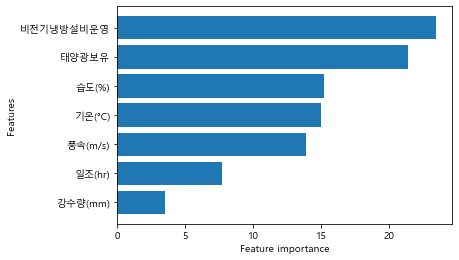

In [41]:
# cat에는 중요도 시각화 기능이 없어 만듦
features=sorted_col[-7:] # 오름차순이기 때문에 큰 값부터 10번째로 큰 값
feature_imp=sorted_imp[-7:]
print(sorted_imp)
print(feature_imp)

# 한글폰트 깨짐
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 시각화
plt.barh(features,feature_imp)
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.show()

### 1) XGBoost 의존도(dependency)

In [42]:
import numpy as np

# 맞춤형 의존도 함수
# (모델, x_train 데이터, 특성변수 수, 특성변수)
def partial_dependency(model, X, features, f_id):
    X_temp = X.copy()
    grid = np.linspace(np.percentile(X_temp.iloc[:, f_id], 0.1), 
                       np.percentile(X_temp.iloc[:, f_id], 99.5), 
                       50)
    y_pred = np.zeros(len(grid))
    
    for i, val in enumerate(grid):
        X_temp.iloc[:, f_id] = val
        y_pred[i] = model.predict(X_temp.iloc[:, :features]).mean()
    
    return grid, y_pred

In [ ]:
features=X_train.shape[1] # 특성변수의 개수
f_id=3 # 특성변수 지정
grid,y_pred=partial_dependency(xg_reg,X_train,features,f_id=f_id)

print(grid) # x축
print(y_pred)# y축

In [ ]:
import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=grid,y=y_pred))
fig.show()

### 2) LightGBM 의존도(dependence)

In [ ]:
from sklearn.inspection import plot_partial_dependence
features=[0,1,(0,1)]
plot_partial_dependence(lgbm_reg,X_train,features)

### 3) CatBoost 의존도(dependency)

In [43]:
features=X_e_train.shape[1]
f_id=0
grid,y_pred=partial_dependency(cat_reg,X_e_train,features,f_id=f_id)

print(grid)
print(y_pred)

[14.3        14.68367347 15.06734694 15.45102041 15.83469388 16.21836735
 16.60204082 16.98571429 17.36938776 17.75306122 18.13673469 18.52040816
 18.90408163 19.2877551  19.67142857 20.05510204 20.43877551 20.82244898
 21.20612245 21.58979592 21.97346939 22.35714286 22.74081633 23.1244898
 23.50816327 23.89183673 24.2755102  24.65918367 25.04285714 25.42653061
 25.81020408 26.19387755 26.57755102 26.96122449 27.34489796 27.72857143
 28.1122449  28.49591837 28.87959184 29.26326531 29.64693878 30.03061224
 30.41428571 30.79795918 31.18163265 31.56530612 31.94897959 32.33265306
 32.71632653 33.1       ]
[1686.33816534 1700.24555417 1696.68462953 1702.02040092 1707.14575217
 1728.99360312 1731.25795751 1740.24995808 1770.65326836 1753.59504636
 1743.87125592 1745.08532395 1762.73750605 1898.18002698 1928.50576005
 1958.86590587 1963.84267031 1983.31080124 2008.17858672 2014.57273586
 2064.71223106 2175.85135514 2215.47486447 2237.16611575 2295.68484814
 2331.2129178  2335.18895499 2346.79

In [48]:
import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=grid,y=y_pred))
fig.update_layout({"xaxis":{"title": "기온(°C)"}, "yaxis":{"title": "Partial dependence"}})
fig.show()

In [50]:
features=X_e_train.shape[1]
f_id=1
grid,y_pred=partial_dependency(cat_reg,X_e_train,features,f_id=f_id)

import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=grid,y=y_pred))
fig.update_layout({"xaxis":{"title": "풍속(m/s)"}, "yaxis":{"title": "Partial dependence"}})
fig.show()

In [52]:
features=X_e_train.shape[1]
f_id=2
grid,y_pred=partial_dependency(cat_reg,X_e_train,features,f_id=f_id)

import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=grid,y=y_pred))
fig.update_layout({"xaxis":{"title": "습도(%)"}, "yaxis":{"title": "Partial dependence"}})
fig.show()

In [53]:
features=X_e_train.shape[1]
f_id=3
grid,y_pred=partial_dependency(cat_reg,X_e_train,features,f_id=f_id)

import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=grid,y=y_pred))
fig.update_layout({"xaxis":{"title": "강수량(mm)"}, "yaxis":{"title": "Partial dependence"}})
fig.show()

In [54]:
features=X_e_train.shape[1]
f_id=4
grid,y_pred=partial_dependency(cat_reg,X_e_train,features,f_id=f_id)

import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=grid,y=y_pred))
fig.update_layout({"xaxis":{"title": "일조(hr)"}, "yaxis":{"title": "Partial dependence"}})
fig.show()

## 지정과제

In [55]:
cat_c_reg = CatBoostRegressor(subsample=0.55, n_estimators=900, max_depth=7, learning_rate=0.03, 
                            colsample_bylevel= 0.7)
cat_c_reg.fit(X_e_train, y_e_train)

0:	learn: 2044.8054915	total: 30.6ms	remaining: 27.5s
1:	learn: 2038.9716273	total: 67.2ms	remaining: 30.2s
2:	learn: 2033.7636525	total: 90.5ms	remaining: 27.1s
3:	learn: 2028.8960667	total: 108ms	remaining: 24.1s
4:	learn: 2024.3926016	total: 124ms	remaining: 22.3s
5:	learn: 2019.5274104	total: 140ms	remaining: 20.9s
6:	learn: 2015.2162205	total: 156ms	remaining: 19.9s
7:	learn: 2011.0045526	total: 171ms	remaining: 19s
8:	learn: 2007.1550336	total: 186ms	remaining: 18.5s
9:	learn: 2003.4422278	total: 202ms	remaining: 18s
10:	learn: 1999.6818709	total: 217ms	remaining: 17.5s
11:	learn: 1996.3209893	total: 239ms	remaining: 17.7s
12:	learn: 1993.0562840	total: 274ms	remaining: 18.7s
13:	learn: 1989.9120119	total: 293ms	remaining: 18.5s
14:	learn: 1987.0017875	total: 310ms	remaining: 18.3s
15:	learn: 1984.4003725	total: 326ms	remaining: 18s
16:	learn: 1982.1602294	total: 345ms	remaining: 17.9s
17:	learn: 1979.7373184	total: 368ms	remaining: 18s
18:	learn: 1977.3624359	total: 389ms	remain

162:	learn: 1913.1996767	total: 3.67s	remaining: 16.6s
163:	learn: 1913.0907674	total: 3.69s	remaining: 16.5s
164:	learn: 1912.9265349	total: 3.71s	remaining: 16.5s
165:	learn: 1912.8377561	total: 3.73s	remaining: 16.5s
166:	learn: 1912.7726592	total: 3.75s	remaining: 16.5s
167:	learn: 1912.6285643	total: 3.78s	remaining: 16.5s
168:	learn: 1912.5456332	total: 3.83s	remaining: 16.6s
169:	learn: 1912.5090632	total: 3.86s	remaining: 16.6s
170:	learn: 1912.4298670	total: 3.89s	remaining: 16.6s
171:	learn: 1912.2229410	total: 3.93s	remaining: 16.6s
172:	learn: 1912.1403756	total: 3.96s	remaining: 16.6s
173:	learn: 1912.0825344	total: 4.01s	remaining: 16.7s
174:	learn: 1912.0256373	total: 4.04s	remaining: 16.7s
175:	learn: 1911.9443360	total: 4.08s	remaining: 16.8s
176:	learn: 1911.8774988	total: 4.13s	remaining: 16.9s
177:	learn: 1911.8266289	total: 4.15s	remaining: 16.9s
178:	learn: 1911.7693319	total: 4.18s	remaining: 16.8s
179:	learn: 1911.6753841	total: 4.2s	remaining: 16.8s
180:	learn:

313:	learn: 1904.3153398	total: 7.12s	remaining: 13.3s
314:	learn: 1904.2706910	total: 7.15s	remaining: 13.3s
315:	learn: 1904.2358333	total: 7.17s	remaining: 13.2s
316:	learn: 1904.2188815	total: 7.19s	remaining: 13.2s
317:	learn: 1904.1779777	total: 7.21s	remaining: 13.2s
318:	learn: 1904.1178687	total: 7.24s	remaining: 13.2s
319:	learn: 1904.0691711	total: 7.26s	remaining: 13.2s
320:	learn: 1904.0671019	total: 7.27s	remaining: 13.1s
321:	learn: 1904.0347409	total: 7.29s	remaining: 13.1s
322:	learn: 1903.9950446	total: 7.32s	remaining: 13.1s
323:	learn: 1903.9396338	total: 7.34s	remaining: 13.1s
324:	learn: 1903.9031606	total: 7.37s	remaining: 13s
325:	learn: 1903.8661269	total: 7.38s	remaining: 13s
326:	learn: 1903.8361260	total: 7.41s	remaining: 13s
327:	learn: 1903.7623675	total: 7.43s	remaining: 13s
328:	learn: 1903.7532808	total: 7.45s	remaining: 12.9s
329:	learn: 1903.7181998	total: 7.47s	remaining: 12.9s
330:	learn: 1903.6947003	total: 7.5s	remaining: 12.9s
331:	learn: 1903.63

463:	learn: 1897.7364300	total: 10.5s	remaining: 9.84s
464:	learn: 1897.6926763	total: 10.5s	remaining: 9.82s
465:	learn: 1897.6417181	total: 10.5s	remaining: 9.8s
466:	learn: 1897.5956796	total: 10.5s	remaining: 9.77s
467:	learn: 1897.5640061	total: 10.6s	remaining: 9.75s
468:	learn: 1897.5379729	total: 10.6s	remaining: 9.72s
469:	learn: 1897.5279398	total: 10.6s	remaining: 9.7s
470:	learn: 1897.4875819	total: 10.6s	remaining: 9.67s
471:	learn: 1897.4669924	total: 10.6s	remaining: 9.65s
472:	learn: 1897.4461555	total: 10.7s	remaining: 9.63s
473:	learn: 1897.4136490	total: 10.7s	remaining: 9.62s
474:	learn: 1897.3923238	total: 10.7s	remaining: 9.6s
475:	learn: 1897.3522431	total: 10.7s	remaining: 9.57s
476:	learn: 1897.2968105	total: 10.8s	remaining: 9.55s
477:	learn: 1897.2783311	total: 10.8s	remaining: 9.52s
478:	learn: 1897.2297372	total: 10.8s	remaining: 9.5s
479:	learn: 1897.1668705	total: 10.8s	remaining: 9.48s
480:	learn: 1897.1028356	total: 10.9s	remaining: 9.46s
481:	learn: 18

616:	learn: 1892.2849584	total: 14.1s	remaining: 6.45s
617:	learn: 1892.2750036	total: 14.1s	remaining: 6.43s
618:	learn: 1892.2486571	total: 14.1s	remaining: 6.41s
619:	learn: 1892.2322519	total: 14.1s	remaining: 6.38s
620:	learn: 1892.1923423	total: 14.2s	remaining: 6.36s
621:	learn: 1892.1576978	total: 14.2s	remaining: 6.33s
622:	learn: 1892.1322082	total: 14.2s	remaining: 6.31s
623:	learn: 1892.1166413	total: 14.2s	remaining: 6.29s
624:	learn: 1892.0819241	total: 14.2s	remaining: 6.26s
625:	learn: 1892.0462261	total: 14.3s	remaining: 6.24s
626:	learn: 1892.0171038	total: 14.3s	remaining: 6.22s
627:	learn: 1892.0026949	total: 14.3s	remaining: 6.19s
628:	learn: 1891.9536154	total: 14.3s	remaining: 6.17s
629:	learn: 1891.8995731	total: 14.3s	remaining: 6.15s
630:	learn: 1891.8766884	total: 14.4s	remaining: 6.12s
631:	learn: 1891.8603204	total: 14.4s	remaining: 6.1s
632:	learn: 1891.8349818	total: 14.4s	remaining: 6.08s
633:	learn: 1891.8119292	total: 14.4s	remaining: 6.05s
634:	learn:

772:	learn: 1887.4986469	total: 17.5s	remaining: 2.88s
773:	learn: 1887.4507922	total: 17.6s	remaining: 2.86s
774:	learn: 1887.4369783	total: 17.6s	remaining: 2.83s
775:	learn: 1887.4082369	total: 17.6s	remaining: 2.81s
776:	learn: 1887.3566341	total: 17.6s	remaining: 2.79s
777:	learn: 1887.3180441	total: 17.6s	remaining: 2.77s
778:	learn: 1887.2878866	total: 17.7s	remaining: 2.74s
779:	learn: 1887.2735993	total: 17.7s	remaining: 2.72s
780:	learn: 1887.2560507	total: 17.7s	remaining: 2.7s
781:	learn: 1887.2343858	total: 17.7s	remaining: 2.67s
782:	learn: 1887.2110171	total: 17.7s	remaining: 2.65s
783:	learn: 1887.2006154	total: 17.8s	remaining: 2.63s
784:	learn: 1887.1743278	total: 17.8s	remaining: 2.6s
785:	learn: 1887.1335354	total: 17.8s	remaining: 2.58s
786:	learn: 1887.1183736	total: 17.8s	remaining: 2.56s
787:	learn: 1887.1063997	total: 17.8s	remaining: 2.54s
788:	learn: 1887.1009722	total: 17.9s	remaining: 2.51s
789:	learn: 1887.0705887	total: 17.9s	remaining: 2.49s
790:	learn: 

In [61]:
# 범주형 데이터를 위한 맟춤형 의존도 함수
import numpy as np

def c_partial_dependency(model, X, features, f_id):
    X_temp = X.copy()
    grid= np.unique(X_temp.iloc[:,f_id])
    y_pred = np.zeros(len(grid))
    
    for i, val in enumerate(grid):
        X_temp.iloc[:, f_id] = val
        y_pred[i] = model.predict(X_temp.iloc[:, :features]).mean()
    
    return grid, y_pred

In [62]:
features=X_e_train.shape[1]
grid,y_pred=c_partial_dependency(cat_c_reg,X_e_train,features,f_id=5)

In [63]:
import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=grid,y=y_pred))
fig.update_layout({"xaxis":{"title": "비전기냉방설비운영"}, "yaxis":{"title": "Partial dependence"}})
fig.show()

In [70]:
features=X_e_train.shape[1]
grid,y_pred=c_partial_dependency(cat_c_reg,X_e_train,features,f_id=6)

import plotly.graph_objects as go
fig=go.Figure(data=go.Scatter(x=grid,y=y_pred))
fig.update_layout({"xaxis":{"title": "태양광보유"}, "yaxis":{"title": "Partial dependence"}})
fig.show()

## 자동화

### 맞춤형 클래스

In [95]:
from sklearn.base import TransformerMixin 
class NullValueImputer(TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        for column in X.columns.tolist():
            if column in X.columns[X.dtypes==object].tolist():
                X[column] = X[column].fillna(X[column].mode())
        return X

In [96]:
class OneHot(TransformerMixin):
    def __init__(self):
        None
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        categorical_columns= X.columns[X.dtypes==object].tolist()
        ohe = OneHotEncoder() 
        hot = ohe.fit_transform(X[categorical_columns])
        hot_df = pd.DataFrame(hot.toarray())
        cold_df = X.select_dtypes(exclude=["object"])
        final_df = pd.concat([cold_df,hot_df],axis=1)
        return final_df

### 최종 자동화 모형

In [97]:
from sklearn.pipeline import Pipeline
data_pipeline = Pipeline([('null_imputer', NullValueImputer()),
                          ('onehot', OneHot()),
                          ('model', CatBoostRegressor(subsample=0.55, n_estimators=900, max_depth=7, learning_rate=0.03, 
                            colsample_bylevel= 0.7)
                         )])

data_pipeline.fit(X_e, y_e)

0:	learn: 2052.8624091	total: 27.7ms	remaining: 24.9s
1:	learn: 2046.9623784	total: 44.4ms	remaining: 19.9s
2:	learn: 2041.3877549	total: 61.5ms	remaining: 18.4s
3:	learn: 2036.3138760	total: 77.6ms	remaining: 17.4s
4:	learn: 2031.4641263	total: 93.2ms	remaining: 16.7s
5:	learn: 2027.0964172	total: 108ms	remaining: 16.1s
6:	learn: 2022.4957803	total: 124ms	remaining: 15.8s
7:	learn: 2018.4221147	total: 140ms	remaining: 15.6s
8:	learn: 2014.8412005	total: 156ms	remaining: 15.4s
9:	learn: 2010.9592088	total: 173ms	remaining: 15.4s
10:	learn: 2007.5977967	total: 188ms	remaining: 15.2s
11:	learn: 2004.3430663	total: 203ms	remaining: 15s
12:	learn: 2000.9284791	total: 224ms	remaining: 15.2s
13:	learn: 1997.8128284	total: 239ms	remaining: 15.1s
14:	learn: 1994.7264770	total: 260ms	remaining: 15.3s
15:	learn: 1991.8107630	total: 274ms	remaining: 15.1s
16:	learn: 1989.2255023	total: 286ms	remaining: 14.8s
17:	learn: 1986.7678952	total: 298ms	remaining: 14.6s
18:	learn: 1984.4524510	total: 310m

157:	learn: 1922.7992504	total: 2.74s	remaining: 12.9s
158:	learn: 1922.6780502	total: 2.76s	remaining: 12.9s
159:	learn: 1922.5614325	total: 2.78s	remaining: 12.9s
160:	learn: 1922.5007324	total: 2.79s	remaining: 12.8s
161:	learn: 1922.4445945	total: 2.8s	remaining: 12.8s
162:	learn: 1922.3024071	total: 2.81s	remaining: 12.7s
163:	learn: 1922.1660297	total: 2.83s	remaining: 12.7s
164:	learn: 1922.0905374	total: 2.84s	remaining: 12.6s
165:	learn: 1922.0384637	total: 2.85s	remaining: 12.6s
166:	learn: 1921.9024341	total: 2.87s	remaining: 12.6s
167:	learn: 1921.8546079	total: 2.89s	remaining: 12.6s
168:	learn: 1921.7796293	total: 2.93s	remaining: 12.7s
169:	learn: 1921.6747234	total: 2.95s	remaining: 12.7s
170:	learn: 1921.5970001	total: 2.96s	remaining: 12.6s
171:	learn: 1921.4882370	total: 3s	remaining: 12.7s
172:	learn: 1921.3574790	total: 3.02s	remaining: 12.7s
173:	learn: 1921.2933265	total: 3.03s	remaining: 12.7s
174:	learn: 1921.2531624	total: 3.04s	remaining: 12.6s
175:	learn: 19

310:	learn: 1914.4547320	total: 5.45s	remaining: 10.3s
311:	learn: 1914.4227212	total: 5.46s	remaining: 10.3s
312:	learn: 1914.4003407	total: 5.47s	remaining: 10.3s
313:	learn: 1914.3731776	total: 5.48s	remaining: 10.2s
314:	learn: 1914.3461025	total: 5.5s	remaining: 10.2s
315:	learn: 1914.2963920	total: 5.51s	remaining: 10.2s
316:	learn: 1914.2572392	total: 5.52s	remaining: 10.2s
317:	learn: 1914.2322953	total: 5.53s	remaining: 10.1s
318:	learn: 1914.1930788	total: 5.56s	remaining: 10.1s
319:	learn: 1914.1468550	total: 5.58s	remaining: 10.1s
320:	learn: 1914.1145960	total: 5.59s	remaining: 10.1s
321:	learn: 1914.0481271	total: 5.6s	remaining: 10.1s
322:	learn: 1914.0155170	total: 5.62s	remaining: 10s
323:	learn: 1913.9468956	total: 5.63s	remaining: 10s
324:	learn: 1913.8977425	total: 5.65s	remaining: 9.99s
325:	learn: 1913.8311974	total: 5.66s	remaining: 9.97s
326:	learn: 1913.7957763	total: 5.67s	remaining: 9.94s
327:	learn: 1913.7435167	total: 5.69s	remaining: 9.92s
328:	learn: 1913

463:	learn: 1908.7542454	total: 7.85s	remaining: 7.38s
464:	learn: 1908.7036460	total: 7.87s	remaining: 7.36s
465:	learn: 1908.6351237	total: 7.88s	remaining: 7.34s
466:	learn: 1908.6132932	total: 7.9s	remaining: 7.32s
467:	learn: 1908.5761086	total: 7.91s	remaining: 7.3s
468:	learn: 1908.5111338	total: 7.92s	remaining: 7.28s
469:	learn: 1908.4764334	total: 7.94s	remaining: 7.26s
470:	learn: 1908.4370468	total: 7.95s	remaining: 7.24s
471:	learn: 1908.4095545	total: 7.97s	remaining: 7.22s
472:	learn: 1908.3884677	total: 7.98s	remaining: 7.21s
473:	learn: 1908.3260439	total: 8s	remaining: 7.19s
474:	learn: 1908.2874580	total: 8.01s	remaining: 7.17s
475:	learn: 1908.2111414	total: 8.03s	remaining: 7.15s
476:	learn: 1908.1963664	total: 8.04s	remaining: 7.13s
477:	learn: 1908.1835505	total: 8.06s	remaining: 7.11s
478:	learn: 1908.1625571	total: 8.07s	remaining: 7.09s
479:	learn: 1908.0812364	total: 8.09s	remaining: 7.08s
480:	learn: 1908.0406477	total: 8.11s	remaining: 7.07s
481:	learn: 190

616:	learn: 1904.0703107	total: 10.2s	remaining: 4.7s
617:	learn: 1904.0422711	total: 10.3s	remaining: 4.68s
618:	learn: 1903.9991057	total: 10.3s	remaining: 4.66s
619:	learn: 1903.9773638	total: 10.3s	remaining: 4.64s
620:	learn: 1903.9540446	total: 10.3s	remaining: 4.62s
621:	learn: 1903.9379117	total: 10.3s	remaining: 4.61s
622:	learn: 1903.9273341	total: 10.3s	remaining: 4.59s
623:	learn: 1903.8974304	total: 10.3s	remaining: 4.57s
624:	learn: 1903.8597622	total: 10.4s	remaining: 4.55s
625:	learn: 1903.8236573	total: 10.4s	remaining: 4.54s
626:	learn: 1903.7979690	total: 10.4s	remaining: 4.52s
627:	learn: 1903.7853353	total: 10.4s	remaining: 4.5s
628:	learn: 1903.7430009	total: 10.4s	remaining: 4.48s
629:	learn: 1903.7093215	total: 10.4s	remaining: 4.46s
630:	learn: 1903.7007285	total: 10.4s	remaining: 4.44s
631:	learn: 1903.6841636	total: 10.4s	remaining: 4.43s
632:	learn: 1903.6340346	total: 10.5s	remaining: 4.41s
633:	learn: 1903.6126529	total: 10.5s	remaining: 4.39s
634:	learn: 

777:	learn: 1899.9520044	total: 12.4s	remaining: 1.95s
778:	learn: 1899.9352770	total: 12.4s	remaining: 1.93s
779:	learn: 1899.9162230	total: 12.5s	remaining: 1.92s
780:	learn: 1899.8797430	total: 12.5s	remaining: 1.9s
781:	learn: 1899.8656182	total: 12.5s	remaining: 1.88s
782:	learn: 1899.8558244	total: 12.5s	remaining: 1.87s
783:	learn: 1899.8350204	total: 12.5s	remaining: 1.85s
784:	learn: 1899.8172459	total: 12.5s	remaining: 1.83s
785:	learn: 1899.7963410	total: 12.5s	remaining: 1.82s
786:	learn: 1899.7745988	total: 12.6s	remaining: 1.8s
787:	learn: 1899.7659205	total: 12.6s	remaining: 1.78s
788:	learn: 1899.7287469	total: 12.6s	remaining: 1.77s
789:	learn: 1899.6929479	total: 12.6s	remaining: 1.75s
790:	learn: 1899.6696178	total: 12.6s	remaining: 1.74s
791:	learn: 1899.6350178	total: 12.6s	remaining: 1.72s
792:	learn: 1899.6099649	total: 12.6s	remaining: 1.7s
793:	learn: 1899.5678052	total: 12.6s	remaining: 1.69s
794:	learn: 1899.5249893	total: 12.6s	remaining: 1.67s
795:	learn: 1

Pipeline(steps=[('null_imputer',
                 <__main__.NullValueImputer object at 0x0000025E1B355C40>),
                ('onehot', <__main__.OneHot object at 0x0000025E1B3559A0>),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x0000025E1B9083A0>)])

### 새로운 데이터

In [29]:
df_new = pd.read_csv('E:/energy/test.csv', encoding='euc-kr')

In [33]:
df_new.head()

,기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_new.columns=['num', 'date_time', '기온(°C)', '풍속(m/s)', '습도(%)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유' ]

In [31]:
df_new['비전기냉방설비운영'] = df_new['비전기냉방설비운영'].astype('object')
df_new['태양광보유'] = df_new['태양광보유'].astype('object')

In [ ]:
X_e_train["비전기냉방설비운영"] = X_e_train["비전기냉방설비운영"].astype(np.int) 
X_e_train["태양광보유"] = X_e_train["태양광보유"].astype(np.int) 

In [32]:
df_new.drop('date_time', axis=1, inplace=True)
df_new.drop('num', axis=1, inplace=True)

In [80]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기온(°C)     3360 non-null   float64
 1   풍속(m/s)    3360 non-null   float64
 2   습도(%)      3360 non-null   float64
 3   강수량(mm)    1680 non-null   float64
 4   일조(hr)     3360 non-null   float64
 5   비전기냉방설비운영  2296 non-null   object 
 6   태양광보유      1624 non-null   object 
dtypes: float64(5), object(2)
memory usage: 551.4+ KB


In [98]:
np.round(data_pipeline.predict(df_new))

array([2610.,  350.,  350., ..., 2820.,  350.,  350.])